# **Mục lục:**

## Phần 1: Giới thiệu
- **1.1 Bối cảnh và mục đích**
- **1.2 Giới thiệu về bộ dữ liệu**

## Phần 2: Khám phá tập dữ liệu
- **2.1 Tổng quan tập dữ liệu**

- **2.2 Tiền xử lý dữ liệu**
    - **Dữ liệu thiếu**
    - **Dữ liệu trùng lặp**
    - **Dữ liệu không hợp lý**
    
- **2.3 Phân tích mô tả đơn biến**
- **2.4 Phân tích mô tả đa biến**


## Phần 3: Mô hình hóa dữ liệu
- **3.1 Chuẩn hóa dữ liệu**
- **3.2 Huấn luyện mô hình dự đoán dữ liệu**
- **3.3 Đánh giá và chọn chỉ số cho mô hình**
- **3.4 Trực quan hóa kết quả**
- **3.5 Phân tích đặc điểm từng nhóm dữ liệu**

## Phần 4: Kết luận
- **4.1 Tóm tắt phát hiện**
- **4.2 Đề xuất giải pháp**


# Phần 1: Giới thiệu

##1.1 Bối cảnh và mục đích:

Trong doanh nghiệp, đôi lúc sẽ có những tập dữ liệu đặc thù chưa được gán nhãn. Đối với những tập dữ liệu như vậy, ta không có căn cứ để phân loại nên sẽ dựa vào đặc trưng tập dữ liệu để phân ra các nhóm tương ứng, sau đó nghiên cứu đặc điểm nổi bật của từng nhóm để đưa ra giải pháp phù hợp.

##1.2 Giới thiệu bộ dữ liệu:


Bộ dữ liệu được lấy trên Kaggle có tên 'Bộ dữ liệu thẻ tín dụng'. Bộ dữ liệu mẫu tóm tắt hành vi sử dụng của khoảng 9000 chủ thẻ tín dụng đang hoạt động trong sáu tháng qua. Từ bộ dữ liệu này, ta sẽ tiến hành phân cụm nó ra để chia thành các phân khúc khách hàng tương ứng.

#Phần 2: Khám phá tập dữ liệu:

##2.1 Tổng quan tập dữ liệu:

In [ ]:
# Nhập các thư viện cần thiết:
# Thư viện để thao tác với ma trận và dataframe
import numpy as np
import pandas as pd

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Ẩn bớt các cảnh báo không cần thiết
import warnings
warnings.filterwarnings('ignore')

# Nhập các model để huấn luyện từ thư viện tương ứng
from sklearn.cluster import KMeans

#Chỉ số đánh giá
from sklearn.metrics import silhouette_score

# Thư viện chuẩn hóa dữ liệu:
from sklearn.preprocessing import MinMaxScaler

#Thư viện giảm chiều dữ liệu
from sklearn.decomposition import PCA

# Thư viện lưu mô hình
import pickle


In [ ]:
# Đọc dữ liệu:
data=pd.read_csv('/content/Customer_Data.csv')

In [ ]:
#Xem 5 hàng đầu tiên tập dữ liệu:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
#Xem số dòng, cột của tập dữ liệu
data.shape

(8950, 18)

Tập dữ liệu này có 8950 dòng và 18 cột

In [ ]:
# Xem kiểu dư liệu:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Bộ dữ liệu mới này gồm có 18 biến, dưới đây là thông tin mô tả về các biến:

|STT| Tên biến | Mô Tả | Kiểu dữ liệu |
|---|--------|---------------------------|------|
|1| CUST_ID | ID chủ thẻ tín dụng| số |
|2| BALANCE  | Tổng số dư hiện tại trong tài khoản (tổng số tiền đang nợ thẻ) | số |
|3| BALANCE_FREQUENCY | Tần suất số dư được cập nhật (mỗi lần phát sinh giao dịch hay cuối kỳ) , giá trị 0 đến 1 (1 = được cập nhật thường xuyên, 0 = không được cập nhật thường xuyên)|số|
|4| PURCHASES |  Tổng số tiền mà người dùng đã chi tiêu trực tiếp qua thẻ (không bao gồm số tiền đã thanh toán trả lại thẻ)| số |
|5|ONEOFF_PURCHASES|Số tiền lớn nhất đã thanh toán trong một lần|số|
|6|INSTALLMENTS_PURCHASES |Tổng số tiền mua sắm theo hình thức trả góp | số |
|7|CASH_ADVANCE|Tổng số tiền mặt mà người dùng đã rút từ thẻ tín dụng của họ dưới dạng ứng tiền|số|
|8|PURCHASES_FREQUENCY |Tần suất mua sắm, điểm số dao động từ 0 đến 1 (trong đó 1 = mua sắm thường xuyên, 0 = không mua sắm thường xuyên)|số|
|9|ONEOFF_PURCHASES_FREQUENCY|Tần suất mua sắm trả một lần (không trả góp), giá trị dao động từ 0 đến 1 (trong đó 1 = mua sắm thường xuyên, 0 = không mua sắm thường xuyên)|số|
|10|PURCHASES_INSTALLMENTS_FREQUENCY|Tần suất mua sắm trả góp, giá trị dao động từ 0 đến 1 (trong đó 1 = thực hiện thường xuyên, 0 = không thực hiện thường xuyên)|số|
|11| CASH_ADVANCE_FREQUENCY |Tần suất ứng tiền mặt từ thẻ tín dụng.|số|
|12| CASH_ADVANCE_TRX  |Tổng số lần người dùng đã thực hiện ứng tiền mặt từ tài khoản|số|
|13|PURCHASES_TRX |Tổng số giao dịch mua sắm mà người dùng đã thực hiện|số|
|14|CREDIT_LIMIT|Hạn mức tín dụng của thẻ người dùng|số|
|15|PAYMENTS| Tổng số tiền mà người dùng đã trả lại cho thẻ tín dụng của họ|số|
|16|MINIMUM_PAYMENTS| Số tiền nhỏ nhất mà người dùng đã thanh toán cho thẻ tín dụng|số|
|17|PRC_FULL_PAYMENT|Phần trăm số tháng mà người dùng đã thanh toán toàn bộ số dư (tháng đó vay và trả hết trong tháng) của họ thay vì thanh toán một phần|số|
|18|TENURE|Tổng số tháng mà người dùng đã sử dụng thẻ tín dụng từ thời điểm mở thẻ đến thời điểm hiện tại|số|

##2.2 Tiền xử lý dữ liệu:

###Dữ liệu thiếu:

In [ ]:
# Kiểm tra số lượng dữ liệu thiếu
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Cột CREDIT_LIMIT có 1 giá trị thiếu
- Cột MINIMUM_PAYMENTS có 313 giá trị thiếu

In [ ]:
# Kiểm tra các giá trị thiếu chiếm bao nhiêu % trong tập dữ liệu:
(data.isna().sum()/data.count())*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011174
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.623943
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

- Cột CREDIT_LIMIT chiếm 0.01%
- Cột MINIMUM_PAYMENTS chiếm 3.6%

--> Số lượng dữ liệu thiếu chiếm khá nhỏ trong số lượng hàng dữ liệu nên ta sẽ tiến hành xóa chúng

In [ ]:
# Xóa các hàng có dữ liệu thiếu
data.dropna(inplace=True)

In [ ]:
# Kiểm tra
(data.isna().sum()>0).sum()

0

Đã xử lý xong dữ liệu thiếu

### Dữ liệu trùng lặp:

In [ ]:
# Kiểm tra số lượng dữ liệu trùng lặp
data.duplicated().sum()

0

Không có dữ liệu trùng lặp

###Dữ liệu không hợp lý:

In [ ]:
# Xóa cột không có đóng góp cho sự phân cụm:
data.drop(columns=['CUST_ID'],inplace=True)

Cột CUST_ID chỉ thể hiện ID khách hàng, ko có ý nghĩa trong việc phân cụm.

In [ ]:
# Xử lý dữ liệu có giá trị không phù hợp trong cột '...FREQUENCY'
def frequency(x):
  if x>=1:
    return 1
  elif x<=0:
    return 0
  else:
    return x
for col in data.columns:
  if 'FREQUENCY' in col:
    data[col]=data[col].apply(lambda x: frequency(x))

##2.3 Phân tích mô tả đơn biến:

In [ ]:
#Tạo tập dữ liệu data2 để chứa biến phân loại:
data2=data[['BALANCE', 'BALANCE_FREQUENCY','CREDIT_LIMIT','TENURE',
            'PURCHASES','PURCHASES_TRX', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY',
            'CASH_ADVANCE','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY',
            'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']]
data=data2.copy()

In [ ]:
# Chuyển các biến tần suất sang dạng danh mục:
def categorical(x):
  if 0<x<=0.3:
    return 'Low'
  elif 0.3<x<0.7:
    return 'Medium'
  else:
    return 'High'

# Chuyển đổi
for col in data.columns:
  if data[col].min()>=0 and data[col].max()<=1:
    data2[col]=data[col].apply(lambda x: categorical(x))

In [ ]:
# Hàm trực quan hóa:
def visualize(column,data,hue=None, palette=None):

  fig,ax=plt.subplots(1,2,figsize=(20,3))
  sns.boxplot(data=data,x=column, ax=ax[0],hue=hue, palette=palette)
  ax[0].grid(linestyle='--')
  ax[0].set_title('Đồ thị boxplot theo {}'.format(column))


  if hue is None:
    sns.histplot(data=data, x=column,ax=ax[1], kde=True,bins=40,hue=hue, palette=palette)
    ax[1].grid(linestyle='--')
    ax[1].set_title('Đồ thị phân phối tần suất theo {}'.format(column))
    ax[1].set_xlim(data[column].min(),data[column].max())
    ax[1].set_ylabel('Mật độ phân phối')
    ax[1].axvline(np.mean(data[column]), color='r', label='Mean', linestyle='--')
    ax[1].axvline(np.median(data[column]), color='b', label='Median', linestyle='--')
    ax[1].legend()
    plt.show()
  else:
    sns.kdeplot(data=data, x=column,ax=ax[1], hue=hue, palette=palette)
    ax[1].grid(linestyle='--')
    ax[1].set_title('Đường phân phối tần suất theo {}'.format(column))
    ax[1].set_xlim(data[column].min(),data[column].max())
    ax[1].set_ylabel('Mật độ phân phối')
    plt.show()

def piechart(column, data,i=None):
  a=data[column].value_counts(normalize=True)
  if i is not None:
    ax[i].pie(a, labels=a.index, autopct='%1.1f%%', shadow=True )
    ax[i].set_title('Biểu đồ tỷ lệ {}'.format(column))
    ax[i].set_xlabel('Label {}'.format(i))
  else:
    plt.pie(a, labels=a.index, autopct='%1.1f%%', shadow=True, explode=[0, 0.1, 0.2])
    plt.title('Biểu đồ hình tròn thể hiện tỷ lệ {}'.format(column))
    plt.show()


In [ ]:
# Số liệu mô tả tổng quan:
round(data.describe(),2)

BALANCE  BALANCE_FREQUENCY  CREDIT_LIMIT   TENURE  PURCHASES  \
count   8636.00            8636.00       8636.00  8636.00    8636.00   
mean    1601.22               0.90       4522.09    11.53    1025.43   
std     2095.57               0.21       3659.24     1.31    2167.11   
min        0.00               0.00         50.00     6.00       0.00   
25%      148.10               0.91       1600.00    12.00      43.37   
50%      916.86               1.00       3000.00    12.00     375.40   
75%     2105.20               1.00       6500.00    12.00    1145.98   
max    19043.14               1.00      30000.00    12.00   49039.57   

       PURCHASES_TRX  PURCHASES_FREQUENCY  ONEOFF_PURCHASES  \
count        8636.00              8636.00           8636.00   
mean           15.03                 0.50            604.90   
std            25.18                 0.40           1684.31   
min             0.00                 0.00              0.00   
25%             1.00                 0.08              0.00   
50%             7.00                 0.50             45.00   
75%            18.00                 0.92            599.10   
max           358.00                 1.00          40761.25   

       ONEOFF_PURCHASES_FREQUENCY  INSTALLMENTS_PURCHASES  \
count                     8636.00                 8636.00   
mean                         0.21                  420.84   
std                          0.30                  917.25   
min                          0.00                    0.00   
25%                          0.00                    0.00   
50%                          0.08                   94.78   
75%                          0.33                  484.15   
max                          1.00                22500.00   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_TRX  \
count                           8636.00       8636.00           8636.00   
mean                               0.37        994.18              3.31   
std                                0.40       2121.46              6.91   
min                                0.00          0.00              0.00   
25%                                0.00          0.00              0.00   
50%                                0.17          0.00              0.00   
75%                                0.75       1132.39              4.00   
max                                1.00      47137.21            123.00   

       CASH_ADVANCE_FREQUENCY  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count                 8636.00   8636.00           8636.00           8636.00  
mean                     0.14   1784.48            864.30              0.16  
std                      0.20   2909.81           2372.57              0.30  
min                      0.00      0.05              0.02              0.00  
25%                      0.00    418.56            169.16              0.00  
50%                      0.00    896.68            312.45              0.00  
75%                      0.25   1951.14            825.50              0.17  
max                      1.00  50721.48          76406.21              1.00

#### 'BALANCE'

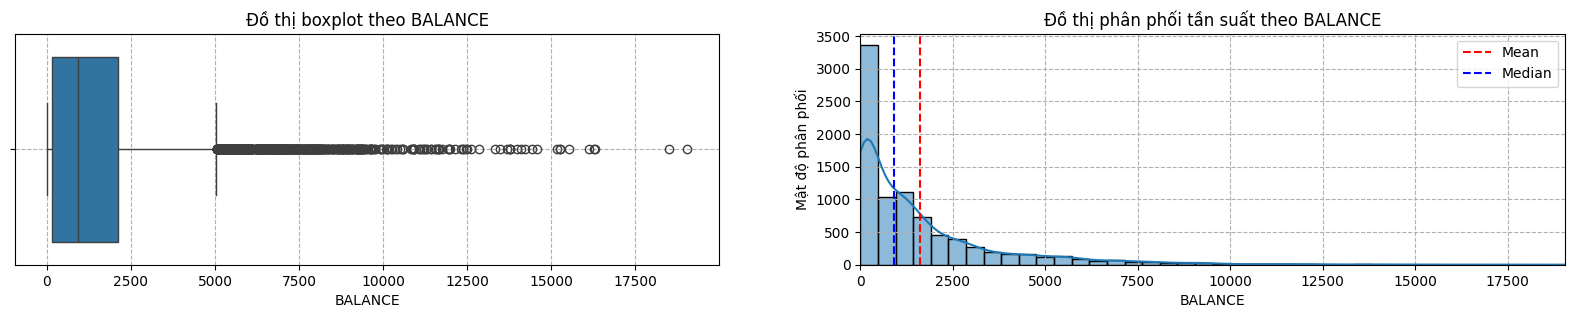

In [ ]:
#Trực quan hóa biến 'BALANCE'
visualize('BALANCE',data2)

- Cột BALANCE thể hiện tổng số tiền mà khách hàng đang nợ thẻ tín dụng tính tới thời điểm thu thập dữ liệu.
- Có 8636 giá trị nằm trong khoảng [0.0, 19043.14] với giá trị trung bình là 1601.22, độ lệch chuẩn là 2095.57 (sự phân tán dữ liệu rất lớn)
- Khoảng số dư từ 0 đến 2500 chiếm phần lớn mẫu
- Phân phối số dư không chuẩn, lệch về bên trái với đuôi kéo dài phía phải
- 50% khách hàng nợ dưới 916 USD, 25% nợ trên 916 USD và dưới 2105 USD
- Vì sự xuất hiện của nhiều giá trị ngoại lai nên trung bình lệch phải so với trung vị--> *có nhiều khách hàng dùng thẻ tín dụng với hạn mức cao hơn mặt bằng chung trong đó khách hàng có mức nợ lớn nhất 19043 USD gấp 8 lần mức nợ của 75% khách hàng phổ thông*.

#### 'BALANCE_FREQUENCY'

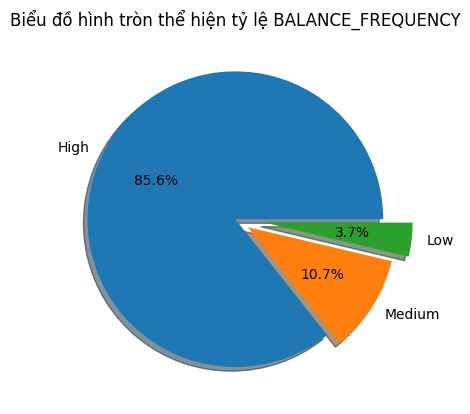

In [ ]:
#Trực quan hóa biến 'BALANCE_FREQUENCY'
piechart('BALANCE_FREQUENCY',data2)

- Cột BALANCE_FREQUENCY thể hiện tần suất cập nhật số dư, thông thường số dư sẽ được cập nhật mỗi khi phát sinh giao dịch hoặc vào cuối kỳ khi ngân hàng tính phí, lãi suất, lãi phạt...
- Có 8636 giá trị chia làm 3 nhóm thể hiện trên biểu đồ:
  - High: nhóm tần suất cao chiếm 85% tổng số, họ là những khách hàng thường xuyên, trung thành, đã tạo được thói quen dùng thẻ tín dụng
  - Medium: khách hàng sử dụng thẻ tín dụng ở mức vừa phải, không quá nhiều nhưng cũng không ít, số này chiếm 10.7%
  - Low: Khách hàng ít sử dụng thẻ tín dụng hoặc chỉ sử dụng thẻ cho các giao dịch không thường xuyên, có thể là do chưa tạo được thói quen sử dụng hoặc họ là khác hàng mới chỉ mở thẻ để trả góp món hàng nào đó, nhóm này chiếm khá thấp tầm 3.7%

  ---> Với tần suất cập nhật số dư cao, tệp khách hàng này rất có hứng thú trong việc sử dụng thẻ tín dụng để chi tiêu.

####'PURCHASES'

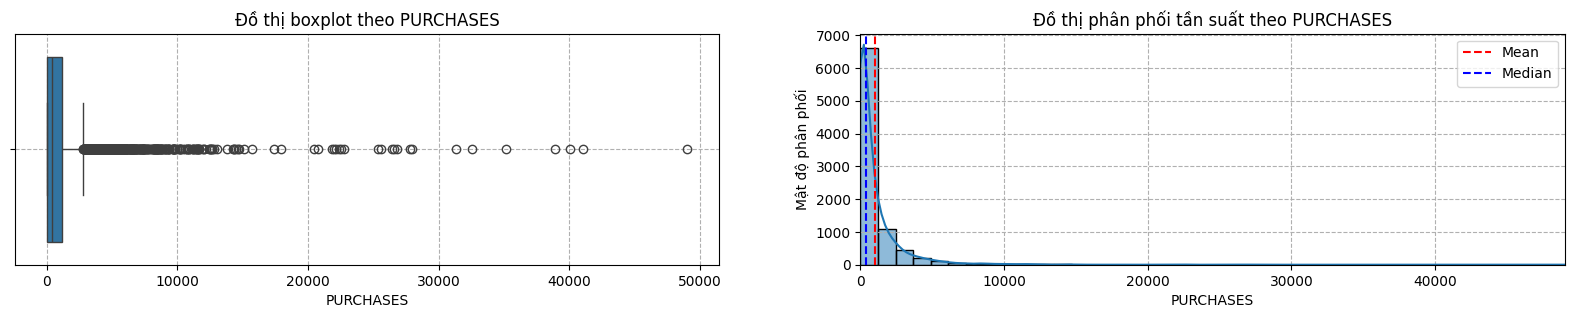

In [ ]:
#Trực quan hóa biến 'PURCHASES'
visualize('PURCHASES',data)

- Cột PURCHASES thể hiện tổng số tiền đã chi tiêu trực tiếp qua thẻ trừ các khoản trả hàng (không bao gồm các khoản đã trả lại thẻ, tiền mặt ứng trước, phí lãi suất, phí phạt, lệ phí, các khoản trả góp)
- Có 8636 giá trị nằm trong khoảng [0.0, 49039.57] với giá trị trung bình là 1025.43, độ lệch chuẩn là 2167.11---> sự phân tán khá lớn
- Với trung vị 375 USD, 50% khách hàng có mức chi tiêu mua sắm rất ít.
- Đồ thị phân phối có hình thái lệch trái với phần đuôi kéo dài phía phải, trung bình 1025 thể hiện có một nhóm nhỏ khách hàng chi tiêu rất nhiều, kéo giá trị trung bình 1025 vượt gấp 3 lần trung vị 375.

####'PURCHASES_TRX'

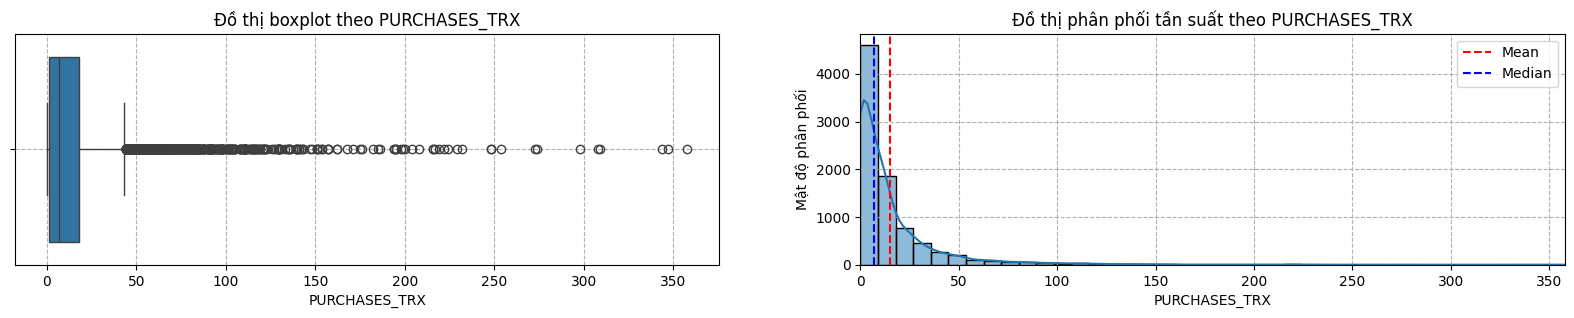

In [ ]:
#Trực quan hóa biến 'PURCHASES_TRX'
visualize('PURCHASES_TRX',data)

- Cột 'PURCHASES_TRX' thể hiện tổng số giao dịch mua sắm mà người dùng đã thực hiện.
- Có 8636 giá trị nằm trong khoảng [0, 358] với giá trị trung bình là 15.03 gấp đôi trung vị là 7, độ lệch chuẩn là 25.18
- 50% khách hàng dùng thẻ tín dụng mua hàng dưới 7 lần, khách hàng mua sắm nhiều nhất là 358 lần
- Phân phối lệch trái với đuôi kéo dài phía phải, độ lệch chuẩn cao, lên tới 25.18, chỉ ra rằng có sự phân tán lớn giữa các khách hàng. Một số khách hàng thực hiện rất nhiều giao dịch, trong khi một số khác thực hiện rất ít hoặc không có giao dịch mua sắm nào.


####'PURCHASES_FREQUENCY'

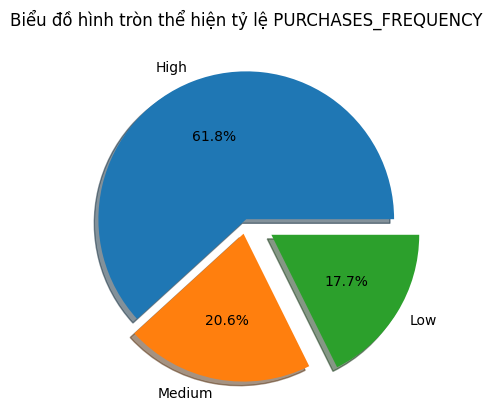

In [ ]:
#Trực quan hóa biến 'PURCHASES_FREQUENCY'
piechart('PURCHASES_FREQUENCY',data2)

- Cột 'PURCHASES_FREQUENCY' thể hiện tần suất mua sắm của khách hàng.
- Có 8636 giá trị chia làm 3 nhóm thể hiện trên biểu đồ:
  - High: nhóm tần suất cao chiếm 61.8% tổng số, họ là những khách hàng có thói quen dùng thẻ tín dụng để mua sắm, chi tiêu, du lịch...
  - Medium: khách hàng có tần suất mua sắm vừa phải số này chiếm 20.6%.
  - Low: Khách hàng ít chi tiêu, mua sắm hoặc họ có thói quen trả tiền mặt, nhóm này chiếm 17.7%

####'ONEOFF_PURCHASES'

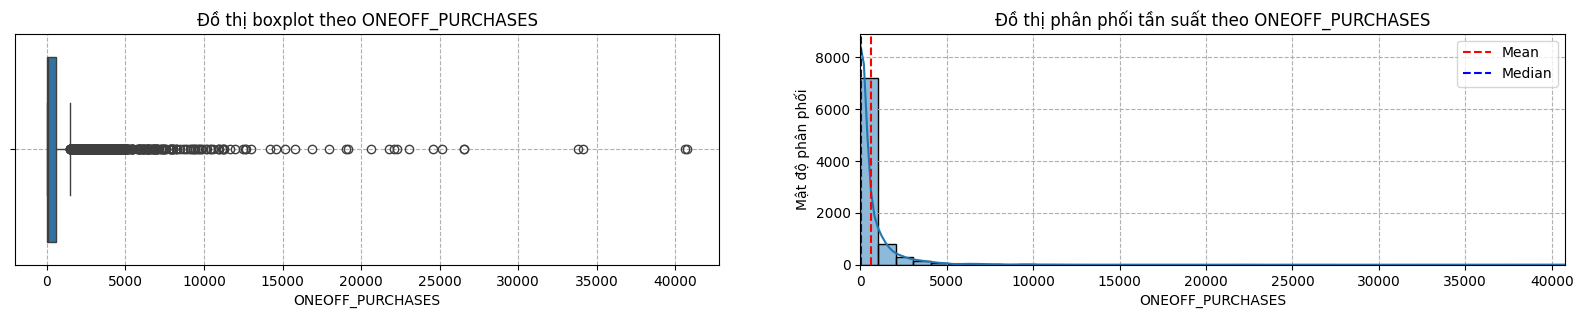

In [ ]:
#Trực quan hóa biến 'ONEOFF_PURCHASES'
visualize('ONEOFF_PURCHASES',data)

- Biến 'ONEOFF_PURCHASES' thể hiện số tiền lớn nhất đã thanh toán trong một lần chi tiêu của khách hàng.
- Có 8636 giá trị nằm trong khoảng [0.0, 40761.25] với giá trị trung bình là 604.9, độ lệch chuẩn là 1684.31 (sự biến động mạnh).
- Với trung vị 45 USD, 50% khách hàng chỉ sử dụng thẻ tín dụng vào các loại hình chi tiêu căn bản như ăn uống, mua sắm, tiêu dùng hàng ngày...
- Đồ thị phân phối có hình thái lệch trái với phần đuôi kéo dài phía phải, trung bình 604 thể hiện có một nhóm nhỏ khách hàng chi tiêu số tiền lớn trong 1 lần, kéo giá trị này vượt xa gấp 12 lần trung vị. Mặt hàng chi tiêu của nhóm này có thể là các mặt hàng đắt tiền như đồ điện tử, hàng hiệu, du lịch,...(hình thức trả góp hay trả 1 lần đều sẽ được hạch toán vào mục này toàn bộ số tiền)
Tuy thiểu số nhưng vì biên độ dao động lớn nên nhóm này đóng góp phần lớn doanh thu cho ngân hàng.

####'ONEOFF_PURCHASES_FREQUENCY'

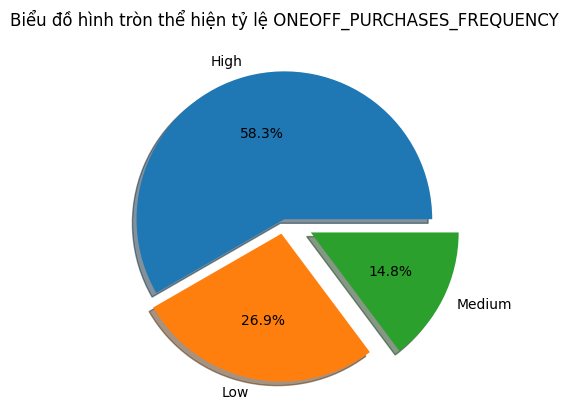

In [ ]:
#Trực quan hóa biến 'ONEOFF_PURCHASES_FREQUENCY'
piechart('ONEOFF_PURCHASES_FREQUENCY',data2)

- Cột 'ONEOFF_PURCHASES_FREQUENCY' thể hiện tần suất mua sắm trả một lần (không trả góp).
- Có 8636 giá trị được chia làm 3 nhóm:
  - High: nhóm tần suất cao chiếm 58.3%, họ là những khách hàng có xu hướng thanh toán toàn bộ chi tiêu ngay lập tức, có thể đó là các giao dịch nhỏ, hoặc họ có khả năng tài chính để chi trả toàn bộ giá trị của những giao dịch lớn mà không cần phải trả góp. Nhóm khách hàng này có khả năng tài chính mạnh, dòng tiền ổn định, thói quen mua sắm tức thì.
  - Medium: chiếm 14.8% nhóm khách hàng này linh hoạt trong phân bổ nguồn lực, tùy khoản chi để chọn thanh toán liền hay trả góp.
  - Low: chiếm 26.9% những khách hàng này ít khi thực hiện giao dịch trả một lần, có thể do họ thích trả góp hoặc chỉ thực hiện các giao dịch lớn với phương thức trả dần.

####'INSTALLMENTS_PURCHASES'

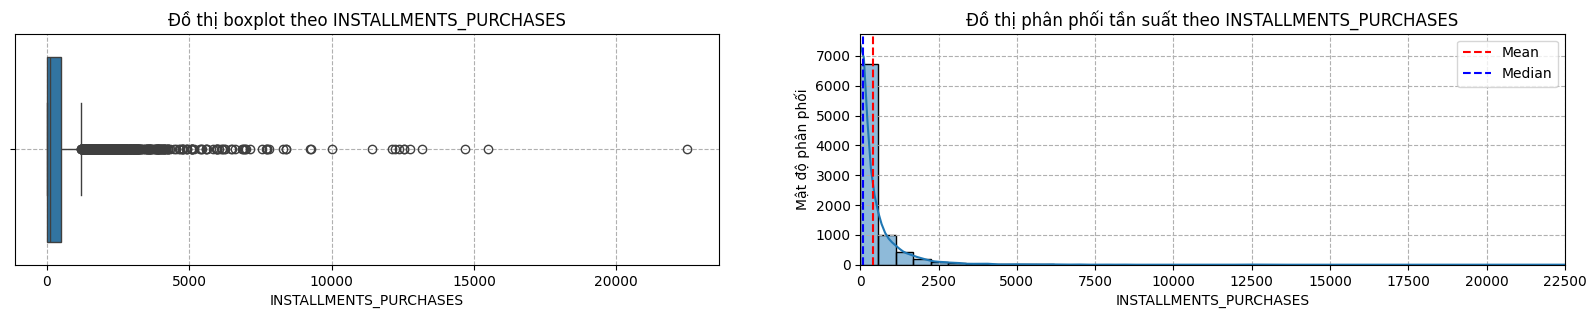

In [ ]:
#Trực quan hóa biến 'INSTALLMENTS_PURCHASES'
visualize('INSTALLMENTS_PURCHASES',data)

- Cột INSTALLMENTS_PURCHASES thể hiện tổng số tiền mua sắm theo hình thức trả góp của khách hàng
- Có 8636 giá trị nằm trong khoảng [0, 22500] với giá trị trung bình là 420.84, độ lệch chuẩn là 917.25 (biến động khá lớn)
- Đồ thị phân phối có hình thái lệch trái với phần đuôi kéo dài phía phải, chỉ có duy nhất 1 khách hàng đang trả góp số tiền 22500 USD, còn lại đều dưới 16000 USD.
- 75% khách hàng trả góp dưới 500 USD --> hầu hết các khoản mua sắm trả góp mà khách hàng thực hiện là nhỏ và có xu hướng ngắn hạn. Nguyên nhân có thể do hạn mức tín dụng thấp, chưa có nhu cầu, mức lãi suất trả góp cao, ít ưu đãi ...

####'PURCHASES_INSTALLMENTS_FREQUENCY'

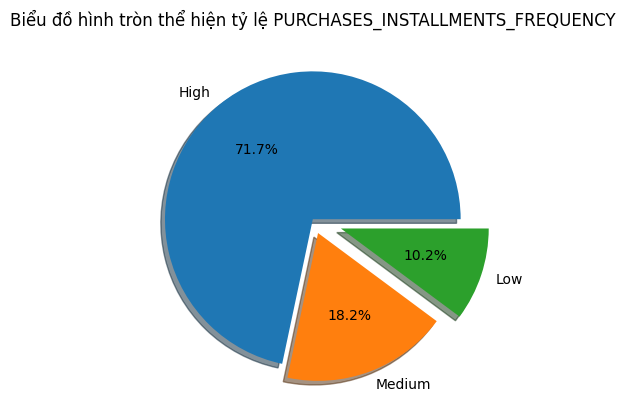

In [ ]:
#Trực quan hóa biến 'PURCHASES_INSTALLMENTS_FREQUENCY'
piechart('PURCHASES_INSTALLMENTS_FREQUENCY',data2)


- Cột 'PURCHASES_INSTALLMENTS_FREQUENCY' thể hiện tần suất mua sắm trả góp của khách hàng.
- Với 8636 giá trị được chia làm 3 nhóm:
  - High: chiếm 71.7%, hầu hết khách hàng đều có nhu cầu mua hàng trả góp.
  - Medium: chiếm 18.2%.
  - Low: chiếm 10.2% nhóm khách hàng này ít khi thực hiện giao dịch trả góp, có thể họ chỉ dùng thẻ tín dụng để chi tiêu mua sắm những món nhỏ thường ngày.

####'CASH_ADVANCE'

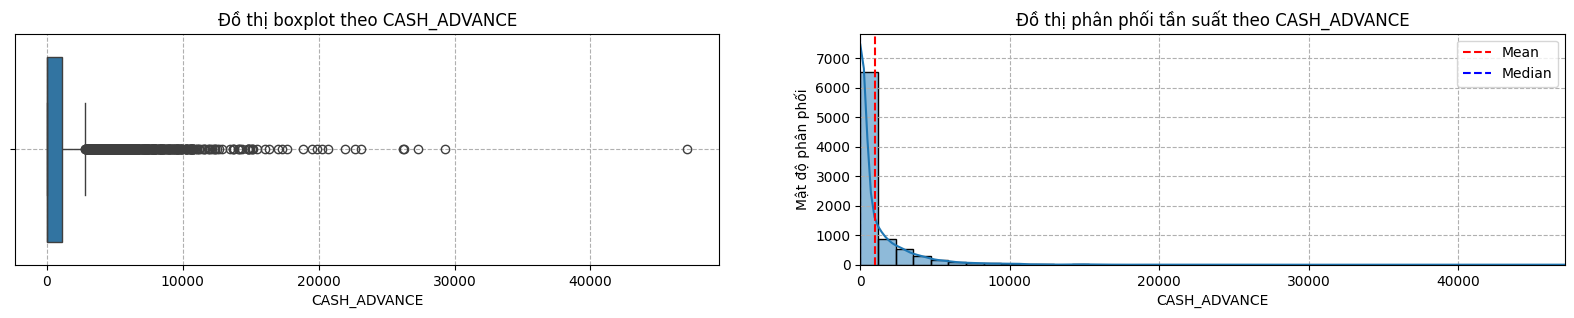

In [ ]:
#Trực quan hóa biến 'CASH_ADVANCE'
visualize('CASH_ADVANCE',data)

- Cột CASH_ADVANCE thể hiện tổng số tiền mặt mà người dùng đã rút từ thẻ tín dụng của họ dưới dạng ứng tiền.
- Có 8636 giá trị nằm trong khoảng [0, 47137.21] với giá trị trung bình là 994.18, độ lệch chuẩn là 2121.46.
- Đồ thị phân phối có hình thái lệch trái với phần đuôi kéo dài phía phải, chỉ có duy nhất 1 khách hàng rút 47137 USD, còn lại tập trung nhiều dưới 10000 USD.
- 50% khách hàng không rút tiền, có lẽ vì phí rút tiền cao nhất trong các loại phí và lãi suất được tính ngay sau khi tiền ra khỏi thẻ.


####'CASH_ADVANCE_TRX'

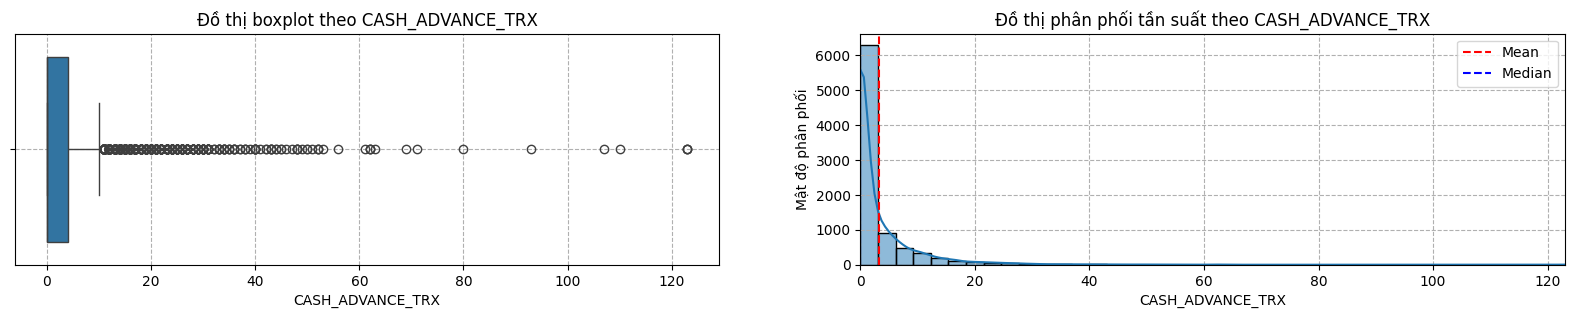

In [ ]:
#Trực quan hóa biến 'CASH_ADVANCE_TRX'
visualize('CASH_ADVANCE_TRX',data)

- Cột 'CASH_ADVANCE_TRX' thể hiện tổng số lần người dùng đã thực hiện ứng tiền mặt từ tài khoản.
- Có 8636 giá trị nằm trong khoảng [0.0, 123.0] với giá trị trung bình là 3.31, độ lệch chuẩn là 6.91.
- Đồ thị có phân phối lệch trái với đuôi dài bên phải, 50% không ứng tiền, 25% ứng tiền dưới 4 lần, số ít ứng tiền trên 40 lần (số ít này là những người không có khả năng quản lý tài chính cũng như dự trù, vì như đã nói phí rút tiền là phí cao nhất trong tất cả phí tín dụng và lãi suất tính ngay thời điểm rút tiền)

####'CASH_ADVANCE_FREQUENCY'

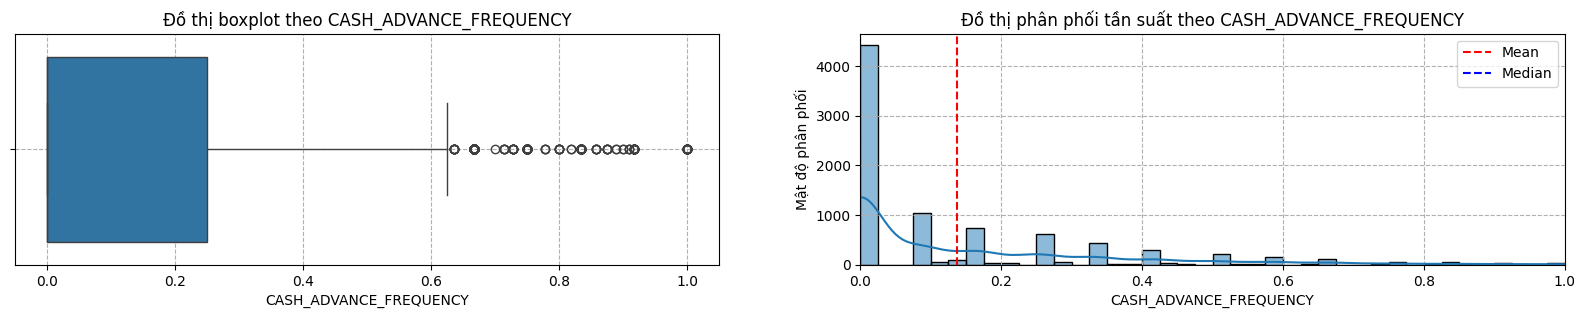

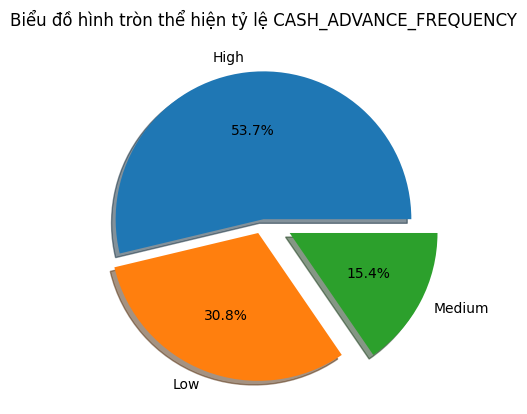

In [ ]:
#Trực quan hóa biến 'CASH_ADVANCE_FREQUENCY'
visualize('CASH_ADVANCE_FREQUENCY',data)
piechart('CASH_ADVANCE_FREQUENCY',data2)

- Cột 'CASH_ADVANCE_FREQUENCY' thể hiện tần suất ứng tiền mặt từ thẻ tín dụng.
- Có 8636 giá trị chia làm 3 nhóm thể hiện trên biểu đồ:
  - High: nhóm tần suất cao chiếm 53.7%
  - Medium: chiếm 15.4%
  - Low: chiếm 30.8%

####'CREDIT_LIMIT'

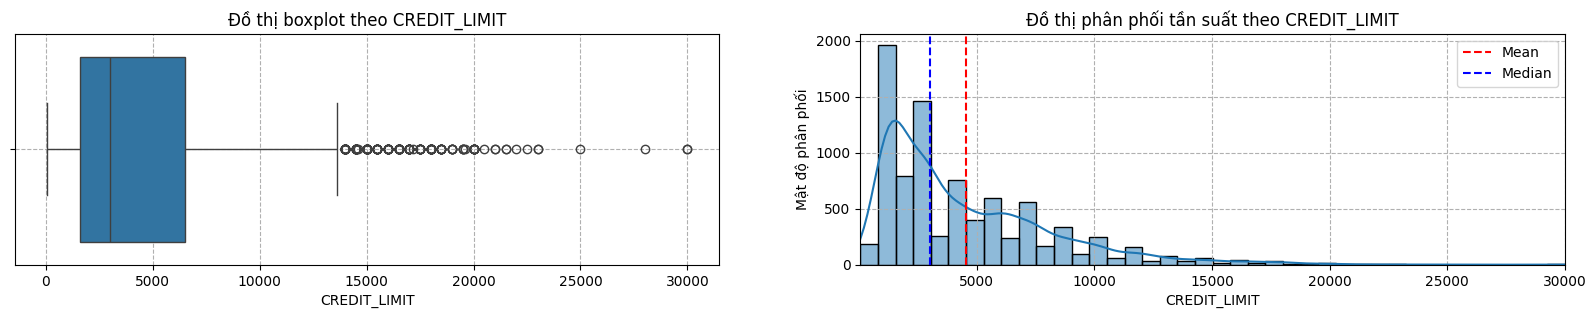

In [ ]:
#Trực quan hóa biến 'CREDIT_LIMIT'
visualize('CREDIT_LIMIT',data)

- Cột 'CREDIT_LIMIT' thể hiện hạn mức tín dụng của khách hàng.
- Có 8636 giá trị nằm trong khoảng [50.0, 30000.0] với giá trị trung bình là 4522.09, độ lệch chuẩn là 3659.24.
- Giá trị trung bình lệch phải so với trung vị 1 khoảng là 659 USD (3659-3000) ---> không quá nhiều, đồ thị phân phối có phần ít dốc nhờ các giá trị ngoại lai tuy giá trị cao nhưng số lượng ít.
- Hạn mức tín dụng thấp nhất là 50 USD, cao nhất là 30.000 USD, vậy những lần mua hàng được thanh toán 1 lần với  giá trị món hàng > 30.000 USD đều là trả góp, hoặc có 1 số thẻ được chi tiêu vượt hạn mức với mức phí phạt cao khi chủ thẻ có lịch sử tín dụng tốt, hoặc dữ liệu thu thập có sai sót.

####'PAYMENTS'

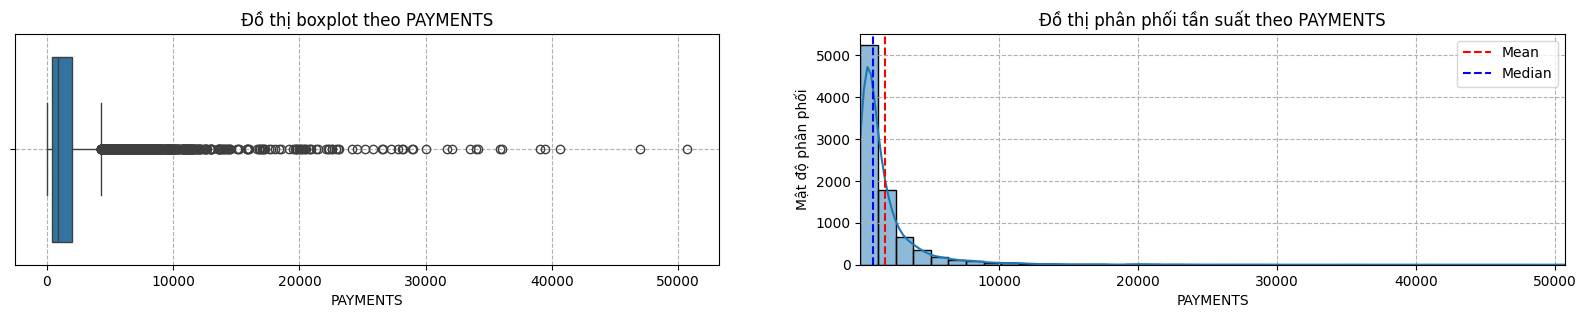

In [ ]:
#Trực quan hóa biến 'PAYMENTS'
visualize('PAYMENTS',data)

- Cột 'PAYMENTS' thể hiện tổng số tiền mà người dùng đã trả lại cho thẻ tín dụng của họ.
- Có 8636 giá trị nằm trong khoảng [0.05, 50721] với giá trị trung bình là 1784.48, độ lệch chuẩn là 2909.81.
- Khoảng giá trị thanh toán dao động từ 0.05 đến 50,721 USD, cho thấy có những khách hàng chỉ thanh toán một khoản rất nhỏ, trong khi có những khách hàng thanh toán số tiền rất lớn.
- Đồ thị có phân phối lệch trái với độc dốc cao, giá trị trung bình 1784 gấp đôi trung vị 896 cho thấy phần lớn khách hàng chọn thanh toán từng khoảng nhỏ thay vì trả hết 1 lần dư nợ, hoặc đa số họ mượn ít nên trả ít.

####'MINIMUM_PAYMENTS'

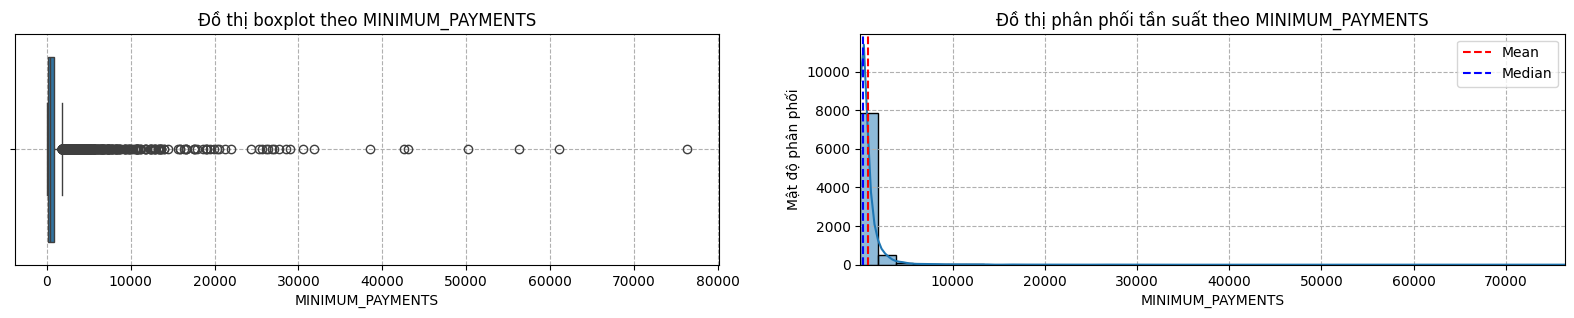

In [ ]:
#Trực quan hóa biến 'MINIMUM_PAYMENTS'
visualize('MINIMUM_PAYMENTS',data)

- Cột 'MINIMUM_PAYMENTS' thể hiện số tiền nhỏ nhất mà người dùng đã thanh toán cho thẻ tín dụng trong khoảng thời gian từ khi mở thẻ đến thời điểm thu thập dữ liệu.
- Có 8636 giá trị nằm trong khoảng [0.02, 76406.21] với giá trị trung bình là 864.3, độ lệch chuẩn là 2372.57
- Giá trị lớn nhất 76406.21 gấp 92 lần 75% giá trị tập dữ liệu (825.5)
- Phân phối lệch trái với độ dốc cao, trung bình 862.3 gấp 2.5 trung vị 312.45 thể hiện một nhóm nhỏ giá trị ngoại lai tác động khá đáng kể đến nhóm còn lại.

####'PRC_FULL_PAYMENT'

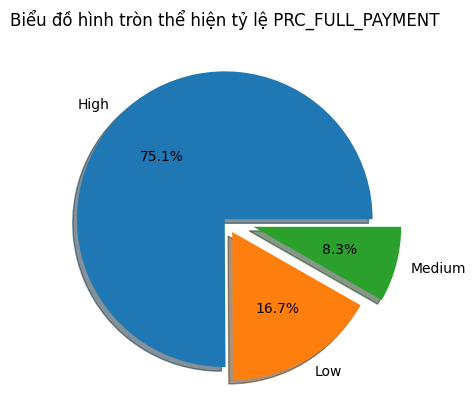

In [ ]:
#Trực quan hóa biến 'PRC_FULL_PAYMENT'
piechart('PRC_FULL_PAYMENT',data2)

- Cột 'PRC_FULL_PAYMENT' thể hiện phần trăm số tháng mà người dùng đã thanh toán toàn bộ số dư (tháng đó vay và trả hết trong tháng) của họ thay vì thanh toán một phần.
- Có 8636 giá trị chia làm 3 nhóm thể hiện trên biểu đồ:
  - High: nhóm tần suất cao chiếm 75.1%, những khách hàng này có khả năng quản lý tài chính tốt và tránh việc tích lũy nợ tín dụng.
  - Medium: chiếm 8.3%
  - Low: chiếm 16.7% khách hàng thuộc nhóm này có nguy cơ cao hơn về việc bị phạt lãi suất cao và tích lũy nợ, vì họ không thanh toán toàn bộ số dư. Điều này có thể dẫn đến tình trạng tín dụng kém hơn và phí trễ hạn cao hơn.
  
  ---> nhìn chung thì chất lượng tệp khách hàng này khá tốt

####'TENURE'

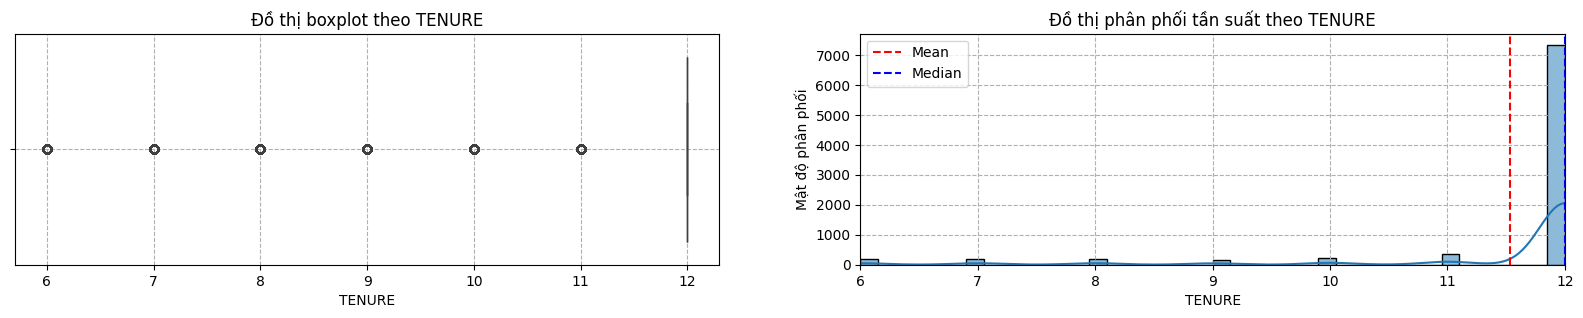

In [ ]:
#Trực quan hóa biến 'TENURE'
visualize('TENURE',data)

- Cột 'TENURE' thể hiện tổng số tháng mà người dùng đã sử dụng thẻ tín dụng từ thời điểm mở thẻ cho đến nay.
- Cột TENURE có 8636 giá trị nằm trong khoảng [6.0, 12.0] kì hạn thấp nhất là 6 và cao nhất là 12.
- Hầu hết mọi người mở thẻ tín dụng theo kì hạn 12 tháng.

##2.4 Phân tích mô tả đa biến:

<Axes: >

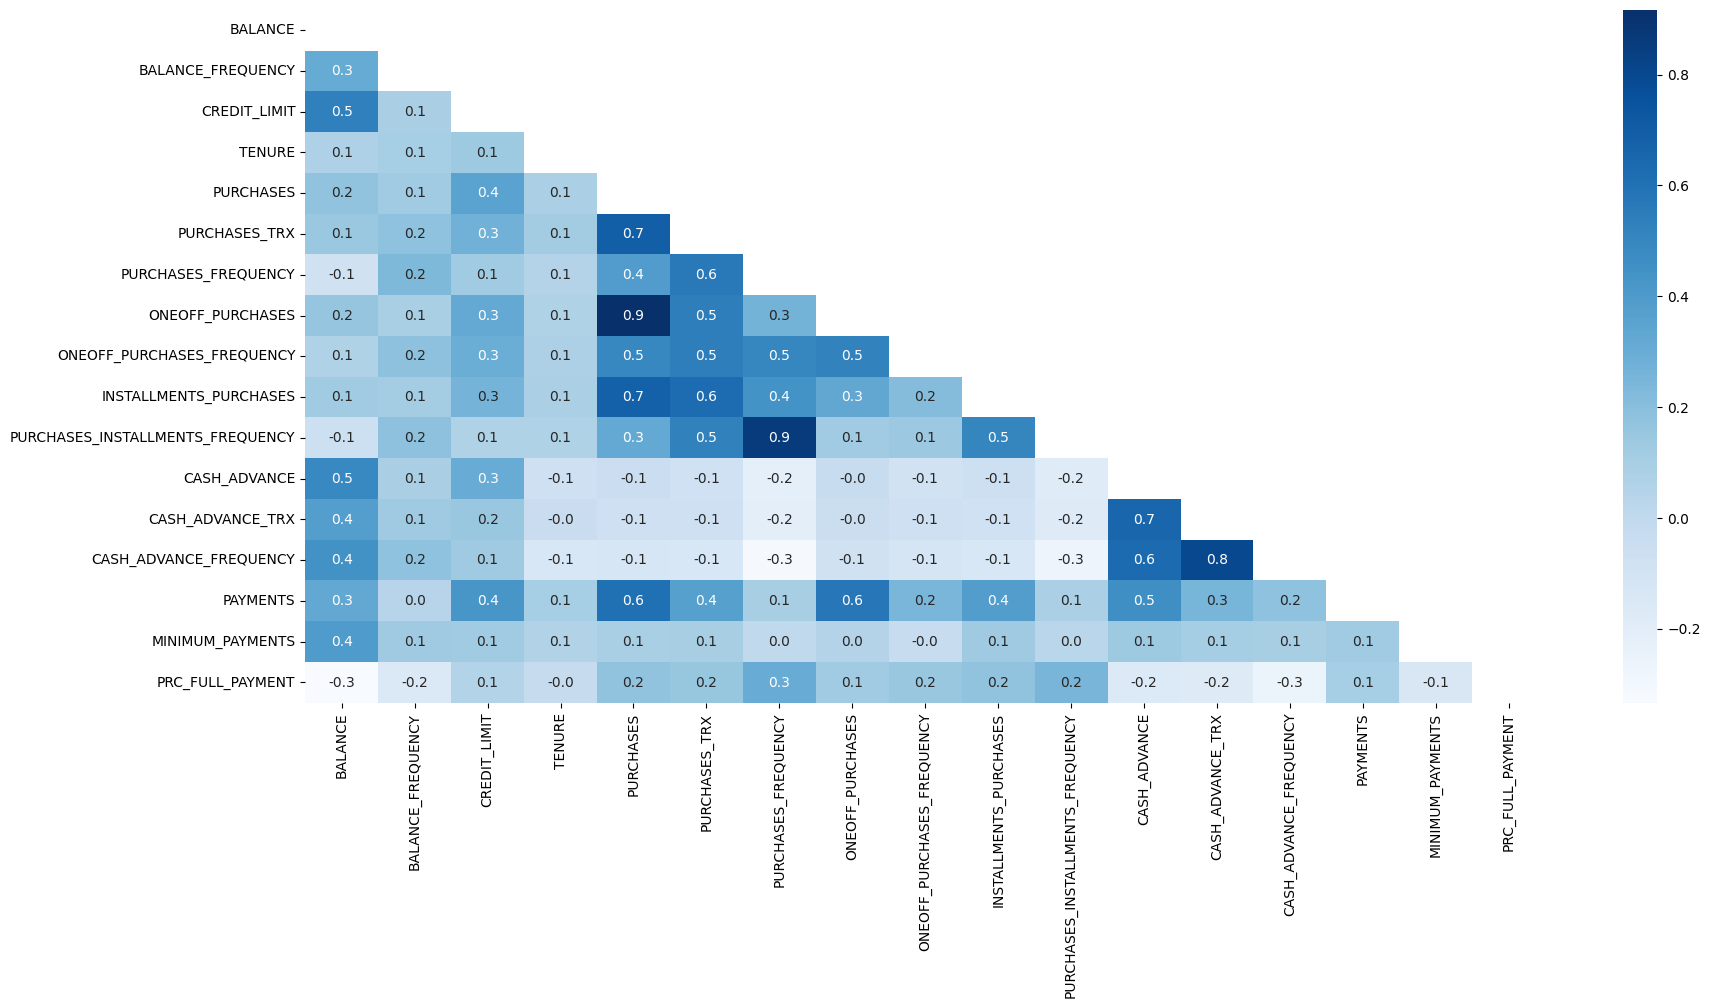

In [ ]:
# Biểu đồ tương quan:
plt.subplots(figsize=(20,9))
mask=np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, fmt='.1f', mask=mask, cmap='Blues')

Dựa trên ý nghĩa các cột, ta tiến hành phân các cột thành 5 nhóm:
- Nhóm số dư và hạn mức tín dụng: BALANCE, BALANCE_FREQUENCY, CREDIT_LIMIT
- Nhóm thông tin liên quan đến mua sắm: PURCHASES, PURCHASES_TRX, PURCHASES_FREQUENCY, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, PURCHASES_INSTALLMENTS_FREQUENCY
- Nhóm thông tin liên quan đến tiền mặt: CASH_ADVANCE, CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY
- Nhóm thanh toán: PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT
- Nhóm thông tin liên quan đến thời gian:TENURE

*Ghi chú: Phần hệ số tương quan này sẽ được phân tích rõ hơn ở dưới đây*

###Nhóm số dư và hạn mức tín dụng:

In [ ]:
data2[['BALANCE', 'BALANCE_FREQUENCY', 'CREDIT_LIMIT']].head()

BALANCE BALANCE_FREQUENCY  CREDIT_LIMIT
0    40.900749              High        1000.0
1  3202.467416              High        7000.0
2  2495.148862              High        7500.0
4   817.714335              High        1200.0
5  1809.828751              High        1800.0

In [ ]:
# Xem số khách hàng sử dụng vượt hạn mức chiếm bao nhiêu tổng số
data2.loc[data2['BALANCE']>data2['CREDIT_LIMIT'],['BALANCE']].count()/data2['BALANCE'].count()*100

BALANCE    2.593793
dtype: float64

--> Khoảng 2% số khách hàng chi tiêu vượt hạn mức tín dụng. Tiếp theo kiểm tra xem số khách hàng này dùng tiền vào việc gì, hành vi tín dụng như nào để có giải pháp phù hợp.

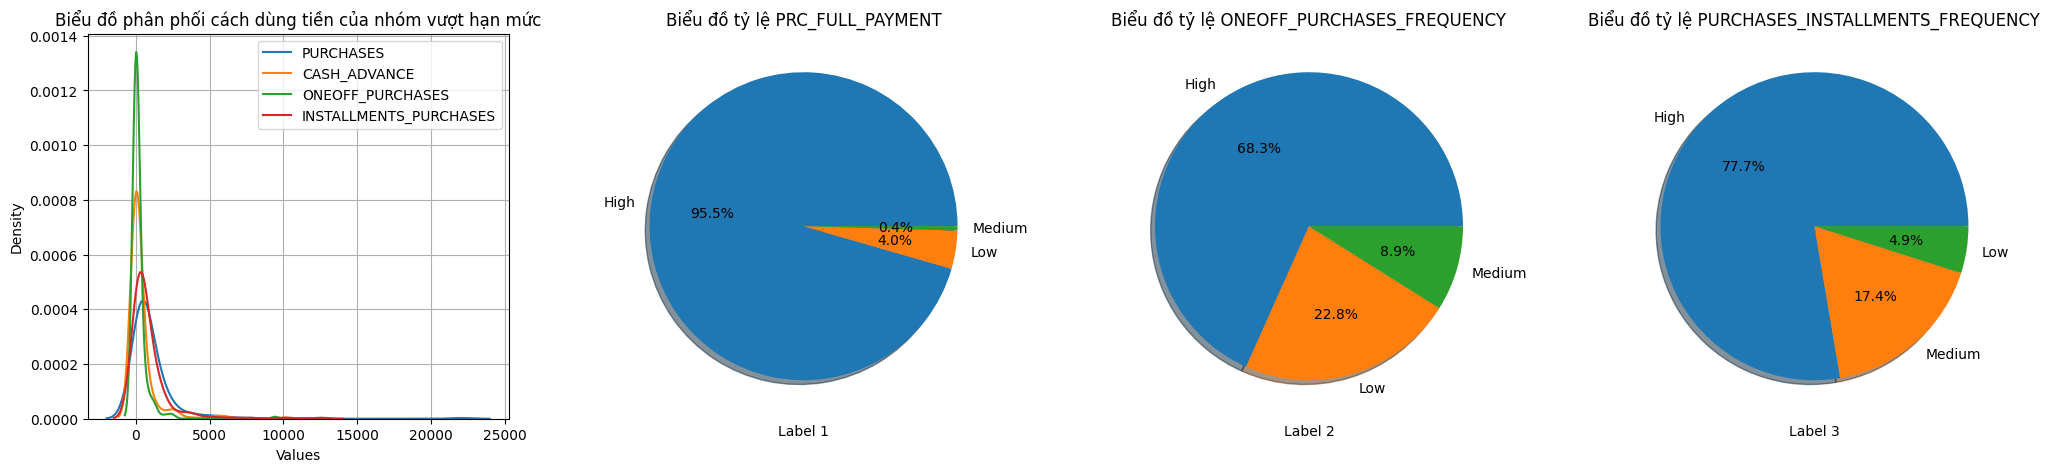

In [ ]:
vuot_han_muc=data2[data2['BALANCE']>data2['CREDIT_LIMIT']]

fig,ax=plt.subplots(1,4,figsize=(25,5))
for col in ['PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']:
  sns.kdeplot(data=vuot_han_muc,x=col,label=col, ax=ax[0])
ax[0].legend()
ax[0].grid()
ax[0].set_title('Biểu đồ phân phối cách dùng tiền của nhóm vượt hạn mức')
ax[0].set_xlabel('Values')


piechart('PRC_FULL_PAYMENT',vuot_han_muc,1)
piechart('ONEOFF_PURCHASES_FREQUENCY',vuot_han_muc,2)
piechart('PURCHASES_INSTALLMENTS_FREQUENCY',vuot_han_muc,3)

- *Nhìn biểu đồ đường ta thấy nhóm vượt hạn mức chủ yếu là dùng tiền để mua sắm theo 2 cách trả 1 lần hoặc trả góp. Tỷ lệ số tháng vay và trả hết liền trong tháng ở mức rất cao 95.5% nên nhóm này có độ uy tín tốt, ko đáng lo ngại để đưa vào nhóm cần xem xét.*
- *Tuy nhiên, lãi suất vượt hạn mức rất cao thường nằm trong khoảng 25-40% cho phần vượt mức nên theo lịch sử tín dụng tốt của nhóm khách hàng này, ta có thể đề xuất **tăng hạn mức tín dụng** hoặc mời khách hàng **chuyển đổi sang vay thấu chi**.*

###Nhóm thông tin liên quan đến mua sắm:

Text(0.5, 1.0, 'Biểu đồ phân tán các biến có tương quan cao với PURCHASES ')

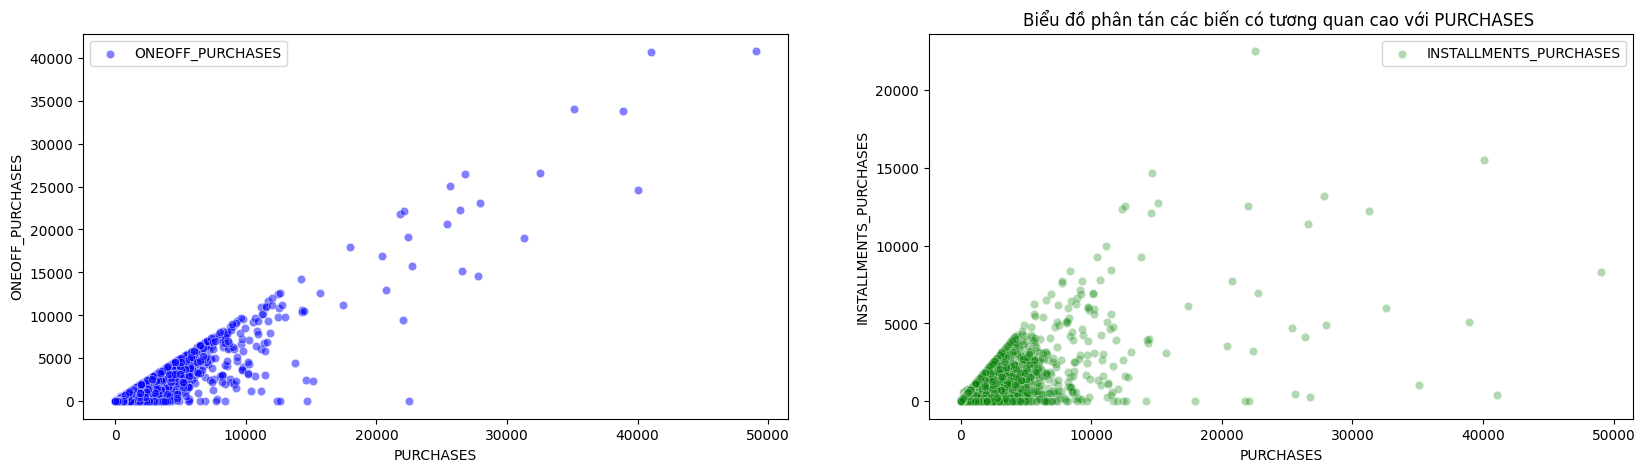

In [ ]:
# Biểu đồ thể hiện mối tương quan giữa 'ONEOFF_PURCHASES'và 'INSTALLMENTS_PURCHASES' với 'PURCHASES':
fig, ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(data=data, y='ONEOFF_PURCHASES', x='PURCHASES', c='b', label='ONEOFF_PURCHASES', alpha=0.5, ax=ax[0])
sns.scatterplot(data=data, y='INSTALLMENTS_PURCHASES', x='PURCHASES', c='g', label='INSTALLMENTS_PURCHASES', alpha=0.3, ax=ax[1])
plt.legend()
plt.title('Biểu đồ phân tán các biến có tương quan cao với PURCHASES ')

- Hệ số tương quan giữa 'ONEOFF_PURCHASES' và  'PURCHASES' là 0.9
- Hệ số tương quan giữa 'INSTALLMENTS_PURCHASES'và 'PURCHASES' là 0.7

--> 2 biến 'ONEOFF_PURCHASES' và 'INSTALLMENTS_PURCHASES' đều có mối tương quan tuyến tính đồng biến cao với 'PURCHASES' nghĩa là người dùng càng có xu hướng bỏ nhiều tiền mua sắm thì số tiền lớn nhất thanh toán trong 1 lần và số tiền trả góp càng tăng.

Tuy nhiên, hệ số tương quan 0.9 cao hơn 0.7 thể hiện các điểm dữ liệu của ONEOFF_PURCHASES tập trung quanh đường thẳng tuyến tính hơn INSTALLMENTS_PURCHASES

--> **số tiền thanh toán 1 lần (ONEOFF_PURCHASES) tác động đến số tiền mua sắm (PURCHASES) nhiều hơn số tiền trả góp (INSTALLMENTS_PURCHASES)**

Text(0.5, 1.0, 'Biểu đồ phân tán các biến có tương quan cao với PURCHASES_FREQUENCY ')

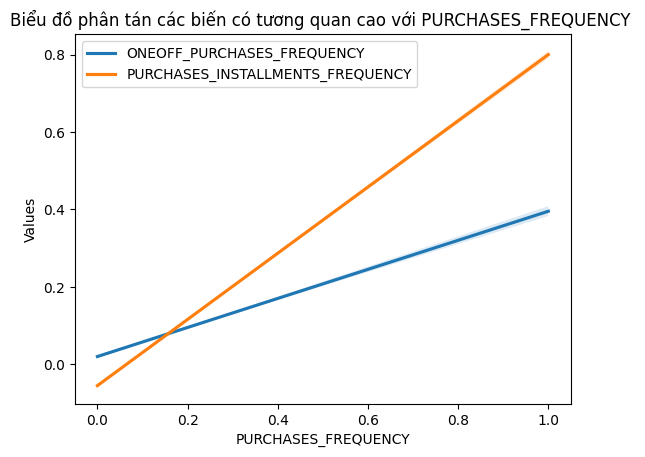

In [ ]:
# Biểu đồ thể hiện mối tương quan giữa 'ONEOFF_PURCHASES_FREQUENCY'và 'PURCHASES_INSTALLMENTS_FREQUENCY' với 'PURCHASES_FREQUENCY':
sns.regplot(data=data, y='ONEOFF_PURCHASES_FREQUENCY', x='PURCHASES_FREQUENCY', label='ONEOFF_PURCHASES_FREQUENCY',scatter=False)
sns.regplot(data=data, y='PURCHASES_INSTALLMENTS_FREQUENCY', x='PURCHASES_FREQUENCY', label='PURCHASES_INSTALLMENTS_FREQUENCY',scatter=False)
plt.legend()
plt.ylabel('Values')
plt.title('Biểu đồ phân tán các biến có tương quan cao với PURCHASES_FREQUENCY ')

- Hệ số tương quan giữa 2 biến 'ONEOFF_PURCHASES_FREQUENCY'và 'PURCHASES_FREQUENCY' là 0.5
- Hệ số tương quan giữa 2 biến 'PURCHASES_INSTALLMENTS_FREQUENCY' và 'PURCHASES_FREQUENCY' là 0.9

--> 2 biến 'ONEOFF_PURCHASES_FREQUENCY' và 'PURCHASES_INSTALLMENTS_FREQUENCY đều có mối tương quan tuyến tính đồng biến cao với 'PURCHASES_FREQUENCY' nghĩa là **người dùng càng có tần suất mua sắm cao thì tần suất thanh toán 1 lần và trả góp sẽ tăng theo.**

Tuy nhiên, xem đồ thị ta thấy độ dốc đường tuyến tính đại diện cho các điểm dữ liệu của 'PURCHASES_INSTALLMENTS_FREQUENCY' cao hơn 'ONEOFF_PURCHASES_FREQUENCY'-->tần suất mua sắm (PURCHASES_FREQUENCY) tăng lên thì phân bổ cho tần suất mua trả góp (PURCHASES_INSTALLMENTS_FREQUENCY) nhiều hơn tần suất mua trả 1 lần (ONEOFF_PURCHASES_FREQUENCY) nói cách khác là **mọi người có xu hướng mua trả góp nhiều hơn trả dứt 1 lần.**

#Phần 3: Mô hình hóa dữ liệu


##3.1 Chuẩn hóa dữ liệu


Ở các cột Frequency có range dữ liệu [0,1] nên khi dùng MinMaxScaler chuẩn hóa dữ liệu về range[0,1] sẽ giúp thuật toán phân cụm tốt hơn.

In [ ]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'CREDIT_LIMIT', 'TENURE', 'PURCHASES',
       'PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES',
       'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
       'CASH_ADVANCE_FREQUENCY', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
# Chuẩn hóa dữ liệu:
scaler=MinMaxScaler()
scaler.fit(data)
new_data=scaler.transform(data)

# Lưu chuẩn mực chuẩn hóa ở file data_scaler.pkl
with open('data_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

- Principal Component Analysis (PCA) là một kỹ thuật giảm chiều dữ liệu phổ biến trong lĩnh vực machine learning và phân tích dữ liệu. Tác dụng chính của PCA trong việc giảm chiều dữ liệu gồm: giảm nhiễu, tăng tốc độ xử lý, giảm hiện tượng đa cộng tuyến, tránh Overfitting... bằng cách tạo ra ít biến hơn từ sự kết hợp tuyến tính của các biến ban đầu.
- Vì không rõ pca bằng bao nhiêu là hợp lý nên ta sẽ cho pca chạy từ 2 đến 16(bộ dữ liệu có 17 tính năng) rồi chọn số chiều mà tại đó khi tăng số chiều lên bộ dữ liệu mới chỉ giải thích thêm số ít phần trăm dữ liệu so với bộ dữ liệu cũ.

Text(0.5, 1.0, 'Biểu đồ mức độ giải thích theo số chiều dữ liệu')

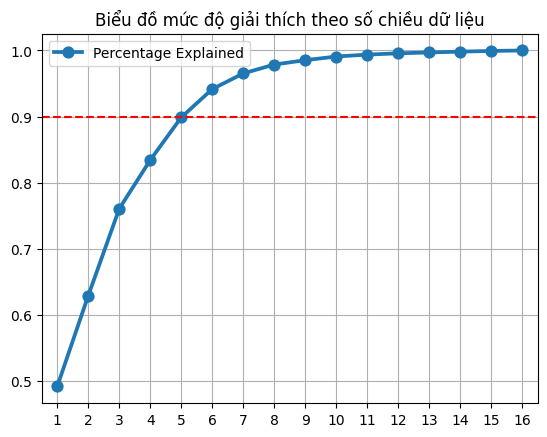

In [ ]:
# Chọn pca
n_pca=[]
percen_ex=[]
for i in range(1,17):
  pca=PCA(n_components=i)
  pca_data=pca.fit_transform(new_data)
  n_pca.append(i)
  percen_ex.append(sum(pca.explained_variance_ratio_))

# Trực quan hóa kết quả
sns.pointplot(x=n_pca,y=percen_ex,label='Percentage Explained')
plt.axhline(0.9, color='r', linestyle='--')
plt.legend()
plt.grid()
plt.title('Biểu đồ mức độ giải thích theo số chiều dữ liệu')

--> Chọn n=5, bộ dữ liệu mới sau khi giảm chiều giữ được 90% thông tin (khi tăng n lên 6, chiều dữ liệu được tăng thêm chỉ giữ thêm số ít thông tin so với việc bỏ chi phí ra để phân tích thêm 1 tính năng)

In [ ]:
# Giảm chiều dữ liệu với n_components=5
pca=PCA(n_components=5)
pca.fit(new_data)
pca_data=pca.transform(new_data)

#Lưu chuẩn mực giảm chiều ở file data_pca.pkl
with open('data_pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

##3.2 Huấn luyện mô hình dự đoán dữ liệu

- Với số chiều dữ liệu là 5, ta huấn luyện mô hình KMeans sao cho các chỉ số của thuật toán phân cụm KMeans tối ưu nhất. Có 2 chỉ số cần quan tâm ở đây là:
  - Inertia: đo tổng khoảng cách bình phương giữa các điểm dữ liệu và centroid của cụm mà chúng thuộc về. Nói cách khác, inertia đo lường sự chặt chẽ của các cụm, nghĩa là các điểm dữ liệu có gần với centroid của cụm của chúng hay không. Inertia càng nhỏ càng tốt.
  - Silhouette: đo lường mức độ gần gũi của các điểm dữ liệu trong cùng một cụm và mức độ tách biệt giữa các cụm. Nó giúp đánh giá xem một điểm dữ liệu có nằm trong đúng cụm hay không. Silhouette gần 1: điểm dữ liệu nằm trong cụm, bằng 0: điểm dữ liệu nằm biên, bằng -1: điểm dữ liệu nằm sai cụm.

In [ ]:
# Huấn luyện dữ liệu
n=[]
inertias=[]
silhouettes=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i, random_state=0)
  kmeans.fit(pca_data)
  n.append(i)
  inertias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(pca_data,kmeans.labels_))

results=pd.DataFrame({'n_clusters':n,'Inertia':inertias,'Silhouette':silhouettes})


##3.3 Đánh giá và chọn chỉ số cho mô hình

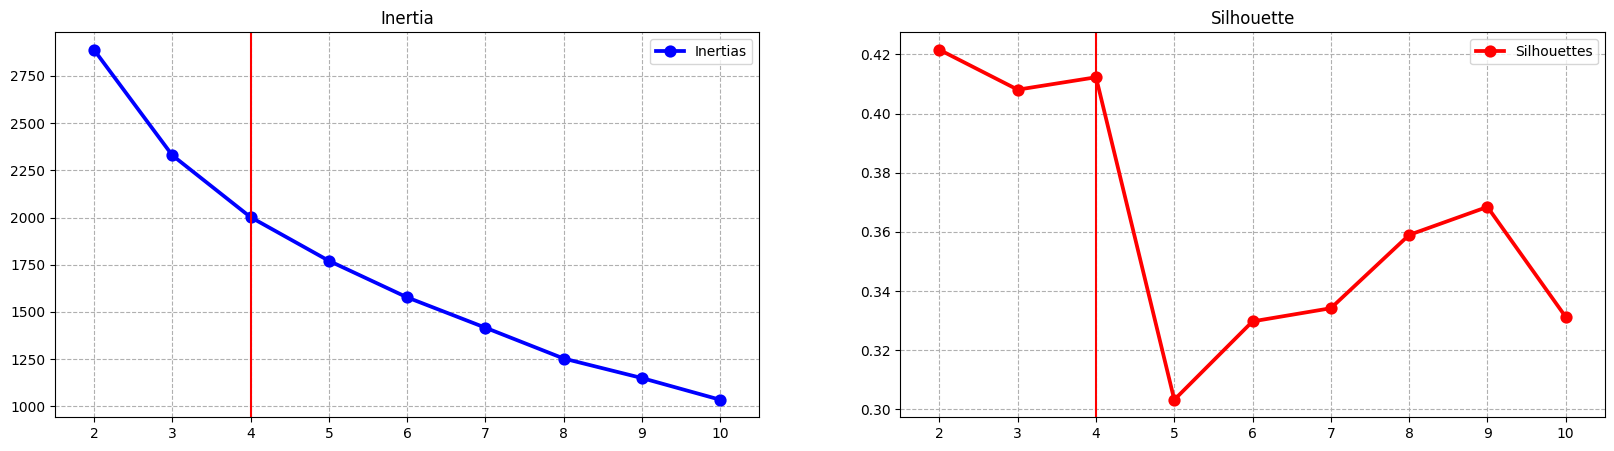

In [ ]:
# Trực quan hóa kết quả huấn luyện
fig,ax=plt.subplots(1,2,figsize=(20,5))

sns.pointplot(x=n,y=inertias, color='b', label='Inertias', ax=ax[0])
ax[0].set_title('Inertia')
ax[0].grid(linestyle='--')
ax[0].axvline(2, color='r')

sns.pointplot(x=n,y=silhouettes, color='r', label='Silhouettes', ax=ax[1])
ax[1].set_title('Silhouette')
ax[1].grid(linestyle='--')
ax[1].axvline(2, color='r')


- Với số cụm n=10 thì chỉ số Inertia đạt giá trị tối ưu nhất.
- Với số cụm n=2 thì chỉ số Silhouette đạt giá trị tối ưu nhất.
---> Tuy nhiên, nhìn chung ta thấy chọn số cụm là 4 (n_clusters=4) thì 2 chỉ số được tối ưu nhất ( vì sau điểm 4, inertia giảm ko đáng kể nhưng silhouette lại giảm nhiều)

In [ ]:
#Chọn n_cluster=4:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_data)
label=kmeans.labels_

# Lưu mô hình huấn luyện ở file data_model.pkl
with open('data_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

##3.4 Trực quan hóa kết quả


Sau quá trình phân cụm, ta đã có 4 nhóm khách hàng. Tiếp theo, ta gán nhãn vào bộ dữ liệu ban đầu để mô tả tính chất mỗi nhóm.

In [ ]:
# Gán nhãn đã phân loại vào bộ dữ liệu ban đầu
data2['Label']=label
data['Label']=label

BALANCE : 
               0         1        2         3
count   4272.00   1228.00   927.00   2209.00
mean    1847.49   1907.97   107.99   1581.08
std     2090.25   2425.26   173.88   2082.06
min        0.00      0.41     0.07      0.00
25%      385.82    300.62    23.95    180.33
50%     1177.83    950.81    55.04    933.62
75%     2489.91   2577.07   121.21   2002.43
max    16304.89  19043.14  1565.98  18495.56


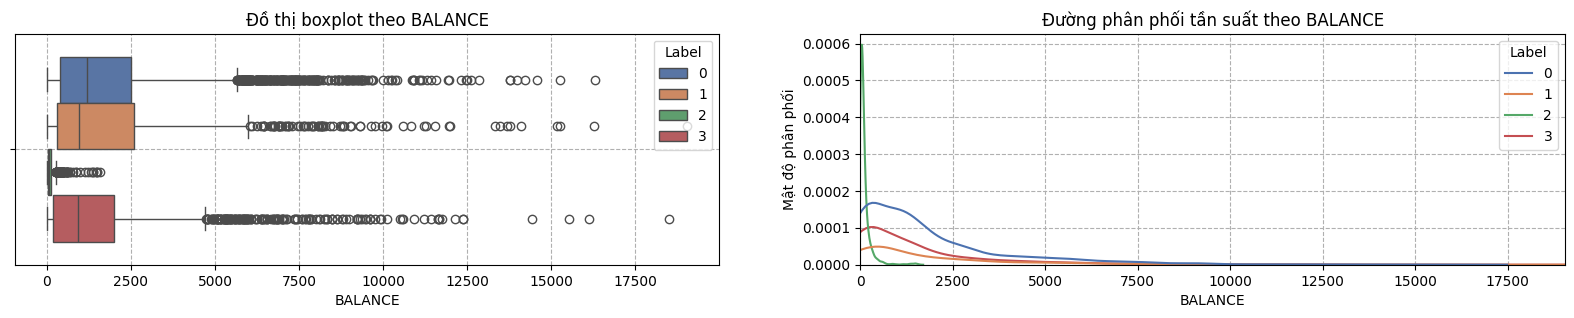





BALANCE_FREQUENCY : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.87     0.98    0.78     0.95
std       0.23     0.07    0.25     0.15
min       0.00     0.18    0.09     0.00
25%       0.82     1.00    0.64     1.00
50%       1.00     1.00    0.90     1.00
75%       1.00     1.00    1.00     1.00
max       1.00     1.00    1.00     1.00


<Figure size 640x480 with 0 Axes>

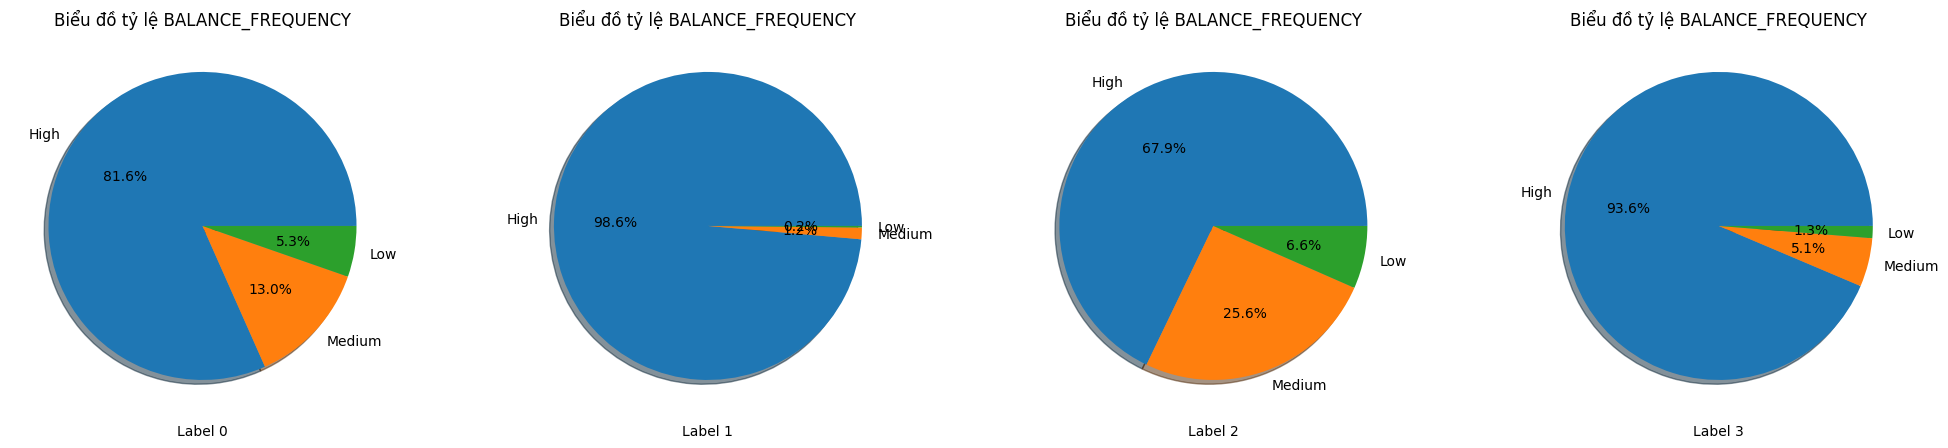

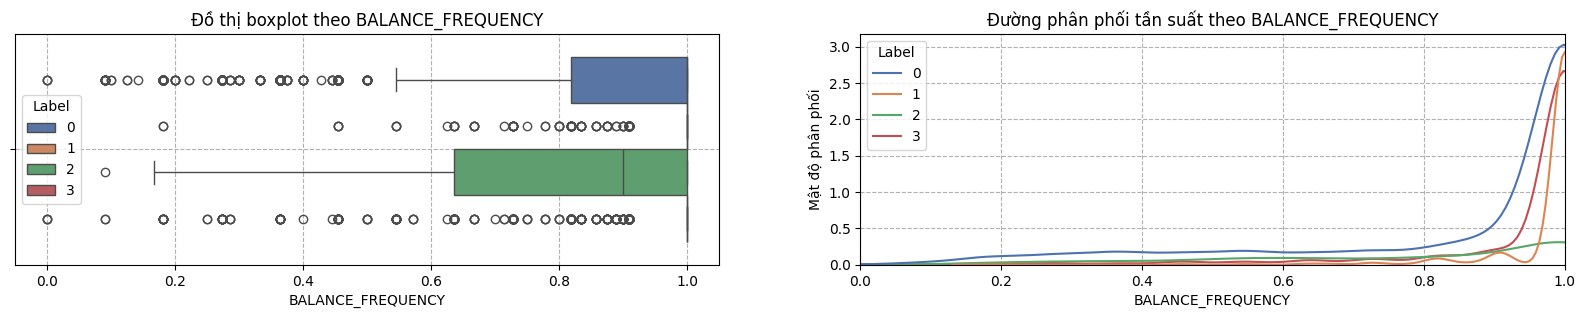





CREDIT_LIMIT : 
               0         1        2         3
count   4272.00   1228.00    927.0   2209.00
mean    4169.11   6735.75   4158.1   4126.88
std     3351.47   4389.14   3465.6   3423.11
min       50.00    300.00    300.0    300.00
25%     1500.00   3400.00   1500.0   1500.00
50%     3000.00   6000.00   3000.0   3000.00
75%     6000.00   9000.00   5700.0   6000.00
max    23000.00  30000.00  21500.0  23000.00


<Figure size 640x480 with 0 Axes>

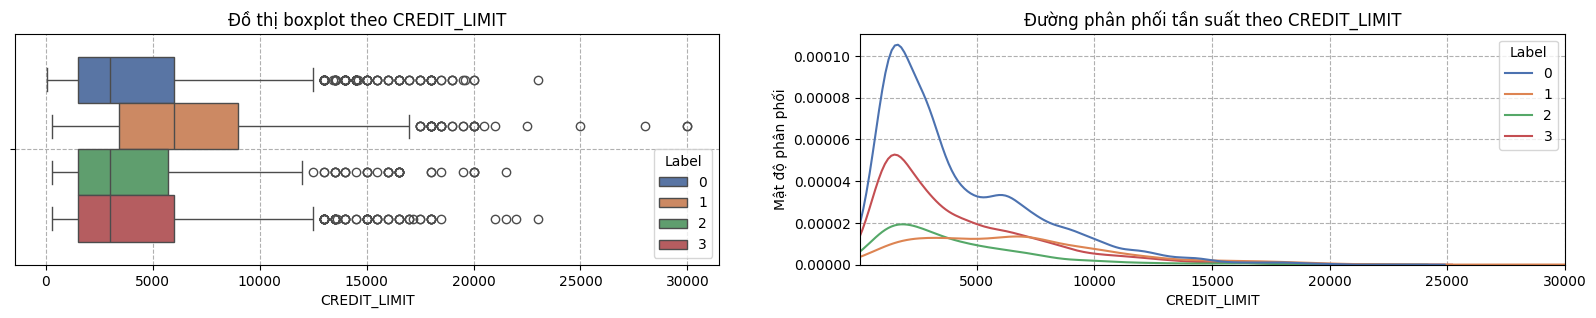





TENURE : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean     11.47    11.77   11.30    11.63
std       1.36     0.95    1.63     1.20
min       6.00     6.00    6.00     6.00
25%      12.00    12.00   12.00    12.00
50%      12.00    12.00   12.00    12.00
75%      12.00    12.00   12.00    12.00
max      12.00    12.00   12.00    12.00


<Figure size 640x480 with 0 Axes>

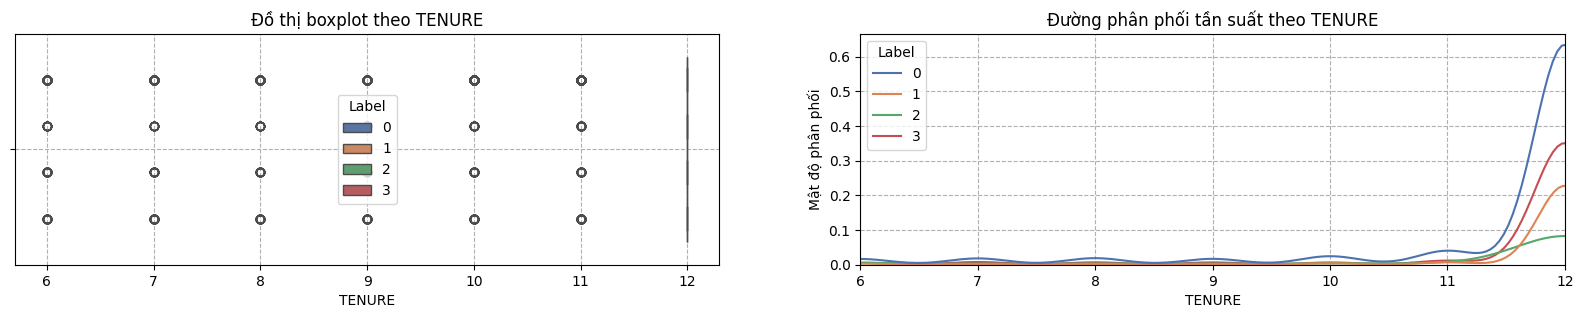





PURCHASES : 
               0         1         2         3
count   4272.00   1228.00    927.00   2209.00
mean     284.28   3291.73   1030.11   1196.94
std      774.12   4313.22   1363.61   1463.02
min        0.00      8.40      0.00     12.00
25%        0.00   1085.49    277.20    362.13
50%       45.62   2126.32    561.48    698.99
75%      298.12   3883.04   1232.78   1520.98
max    22101.78  49039.57  14604.87  22500.00


<Figure size 640x480 with 0 Axes>

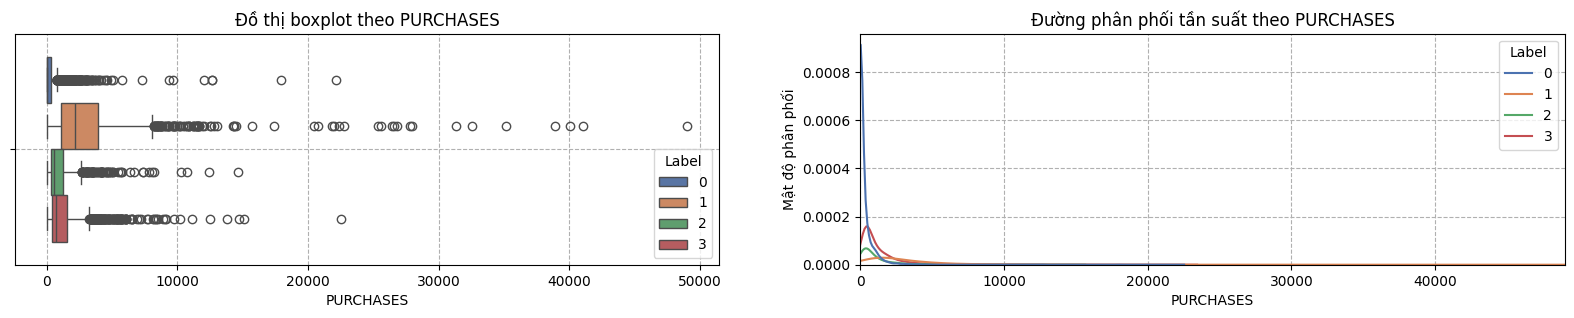





PURCHASES_TRX : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      2.58    43.10   15.71    23.23
std       4.99    40.52   19.00    23.70
min       0.00     5.00    0.00     0.00
25%       0.00    18.00    6.00    11.00
50%       1.00    30.00   11.00    15.00
75%       4.00    53.00   18.00    27.00
max     186.00   358.00  232.00   347.00


<Figure size 640x480 with 0 Axes>

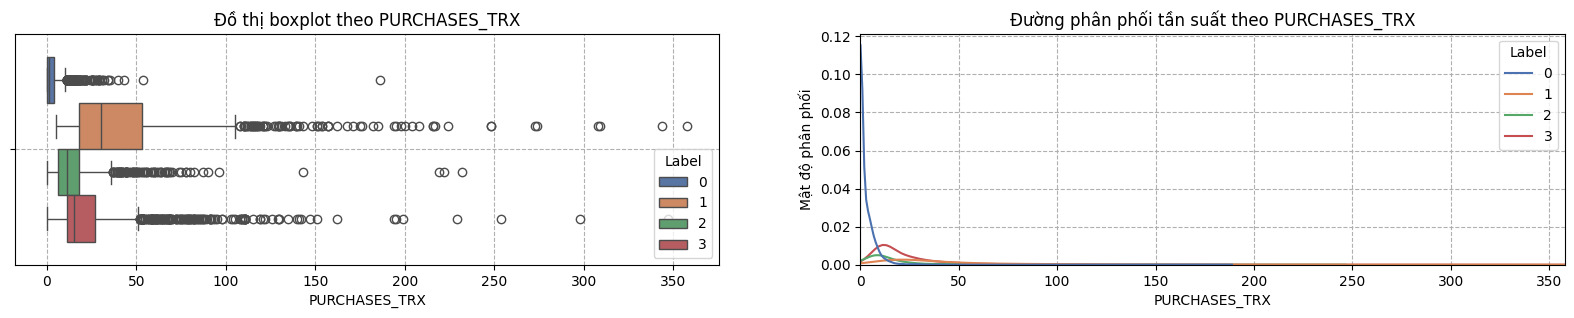





PURCHASES_FREQUENCY : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.14     0.90    0.72     0.87
std       0.17     0.14    0.28     0.16
min       0.00     0.50    0.00     0.50
25%       0.00     0.83    0.50     0.75
50%       0.08     1.00    0.75     1.00
75%       0.25     1.00    1.00     1.00
max       0.67     1.00    1.00     1.00


<Figure size 640x480 with 0 Axes>

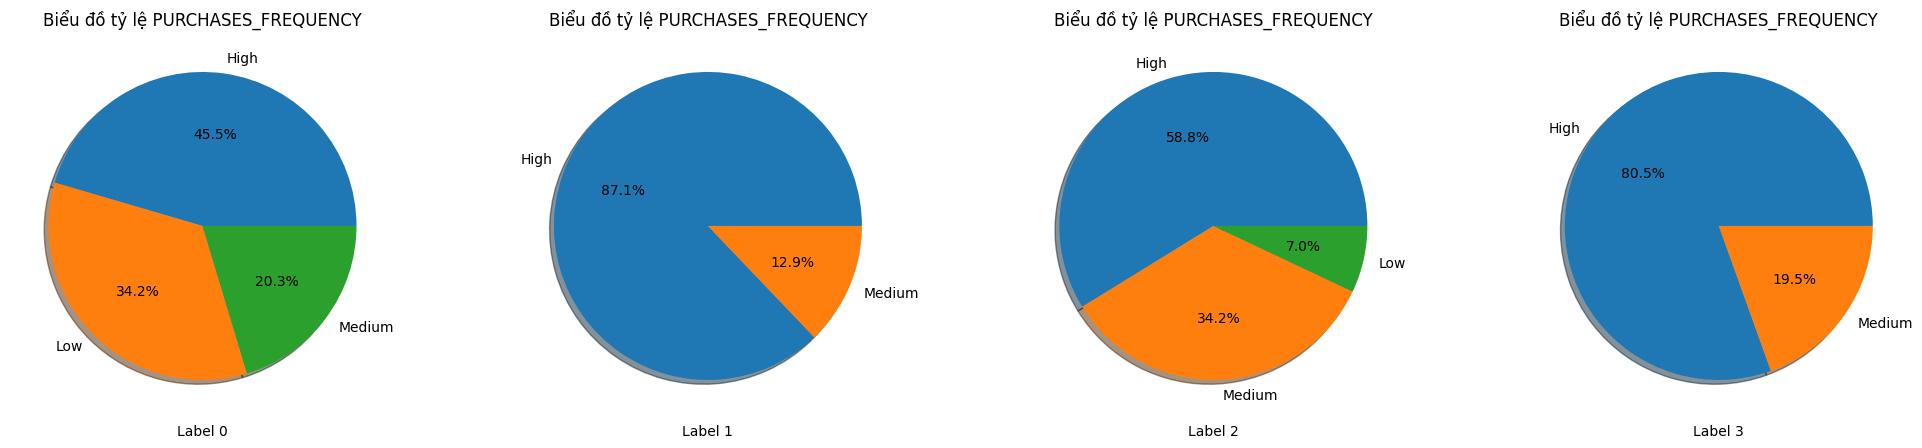

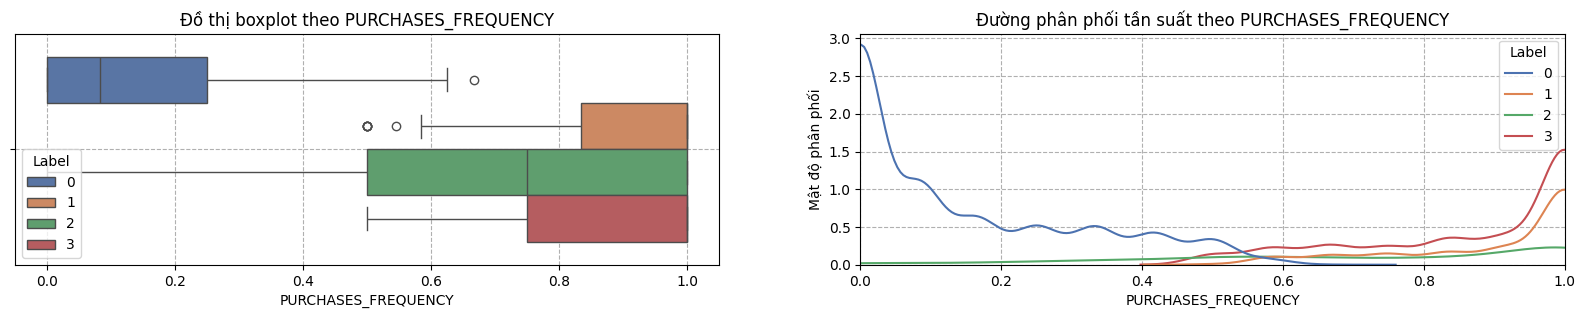





ONEOFF_PURCHASES : 
               0         1        2        3
count   4272.00   1228.00   927.00  2209.00
mean     234.14   2512.97   315.29   382.74
std      729.80   3516.65   781.81   748.43
min        0.00      8.40     0.00     0.00
25%        0.00    838.06     0.00     0.00
50%        0.00   1543.82     0.00    32.74
75%      211.18   2797.55   178.42   452.32
max    22101.78  40761.25  6965.06  9805.73


<Figure size 640x480 with 0 Axes>

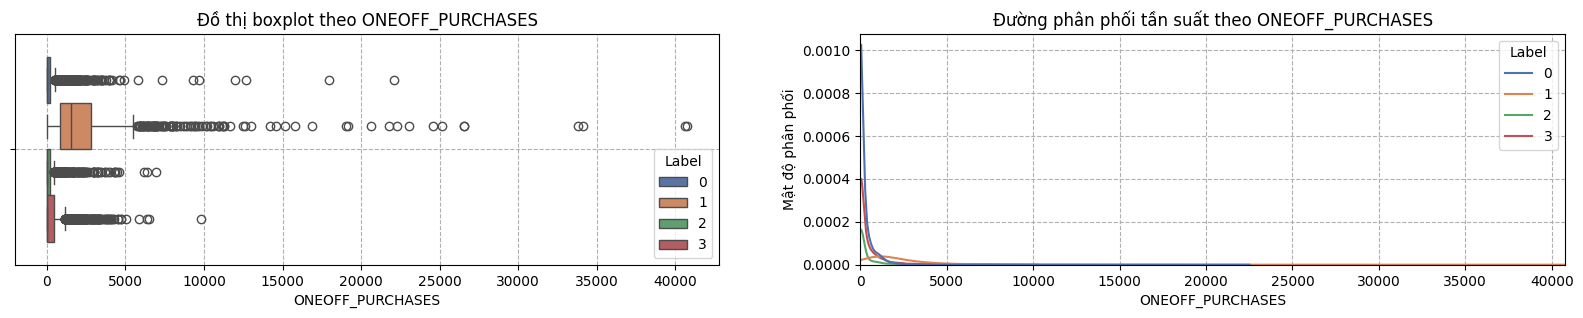





ONEOFF_PURCHASES_FREQUENCY : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.08     0.83    0.11     0.13
std       0.13     0.17    0.19     0.18
min       0.00     0.33    0.00     0.00
25%       0.00     0.67    0.00     0.00
50%       0.00     0.92    0.00     0.08
75%       0.10     1.00    0.13     0.25
max       0.58     1.00    0.88     0.67


<Figure size 640x480 with 0 Axes>

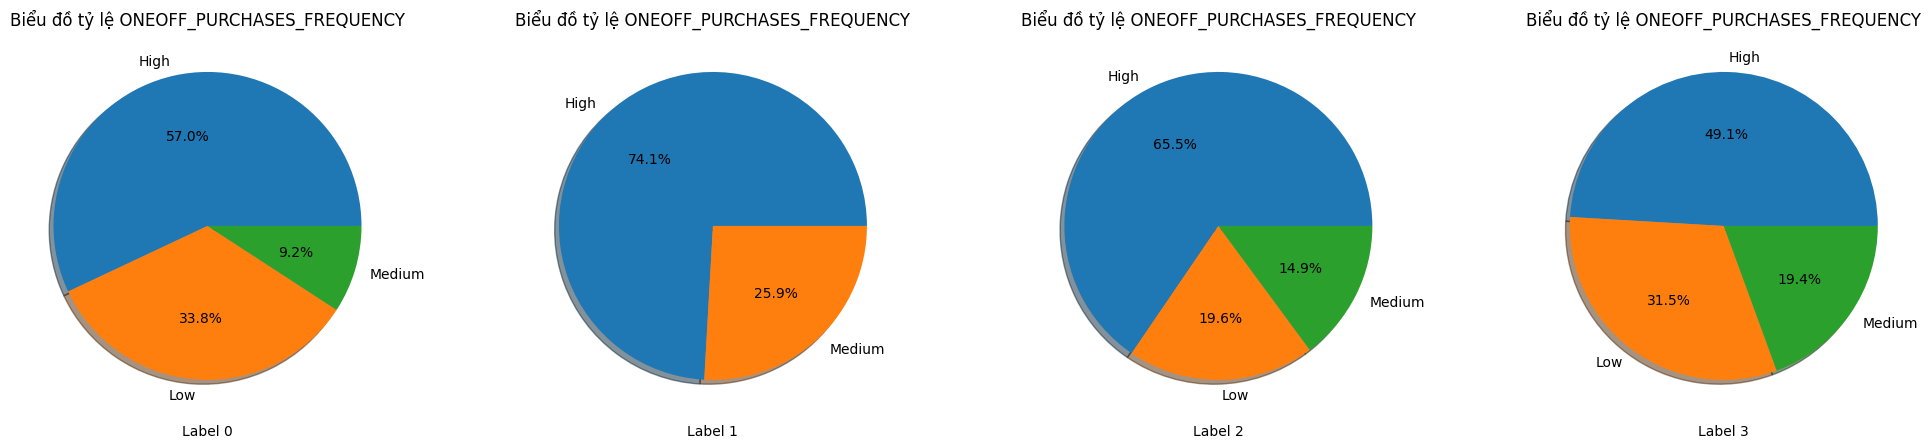

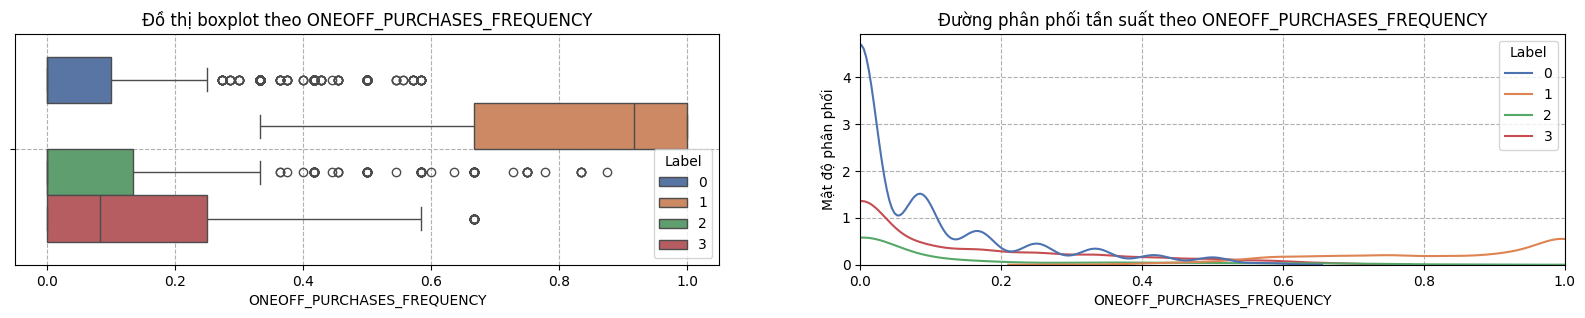





INSTALLMENTS_PURCHASES : 
               0         1         2         3
count   4272.00   1228.00    927.00   2209.00
mean      50.30    778.75    715.59    814.79
std      248.12   1392.04    998.27   1071.36
min        0.00      0.00      0.00      9.65
25%        0.00      0.00    200.00    276.62
50%        0.00    309.00    426.47    500.00
75%        0.00    950.35    897.74    999.77
max    12541.00  15497.19  12375.00  22500.00


<Figure size 640x480 with 0 Axes>

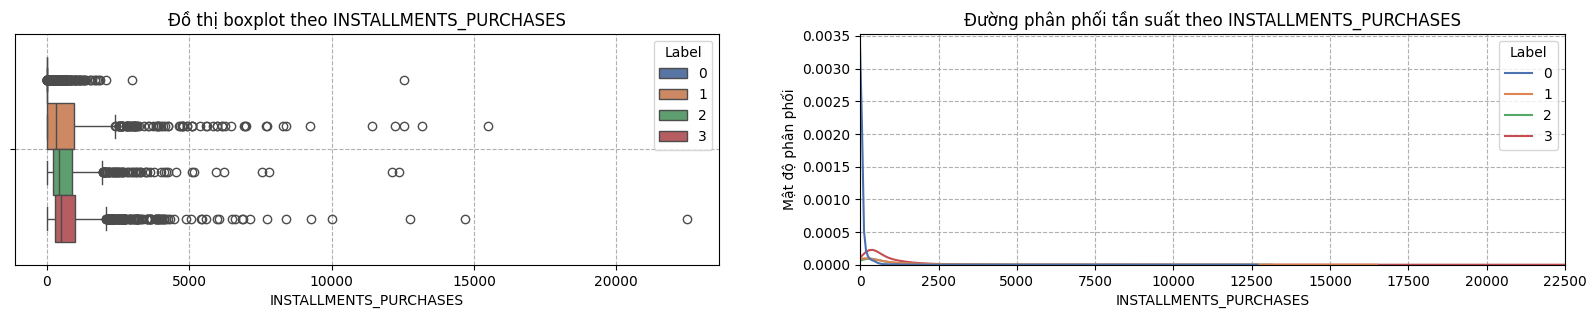





PURCHASES_INSTALLMENTS_FREQUENCY : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.05     0.46    0.63     0.82
std       0.11     0.39    0.33     0.19
min       0.00     0.00    0.00     0.25
25%       0.00     0.00    0.42     0.67
50%       0.00     0.42    0.67     0.90
75%       0.00     0.83    0.92     1.00
max       0.50     1.00    1.00     1.00


<Figure size 640x480 with 0 Axes>

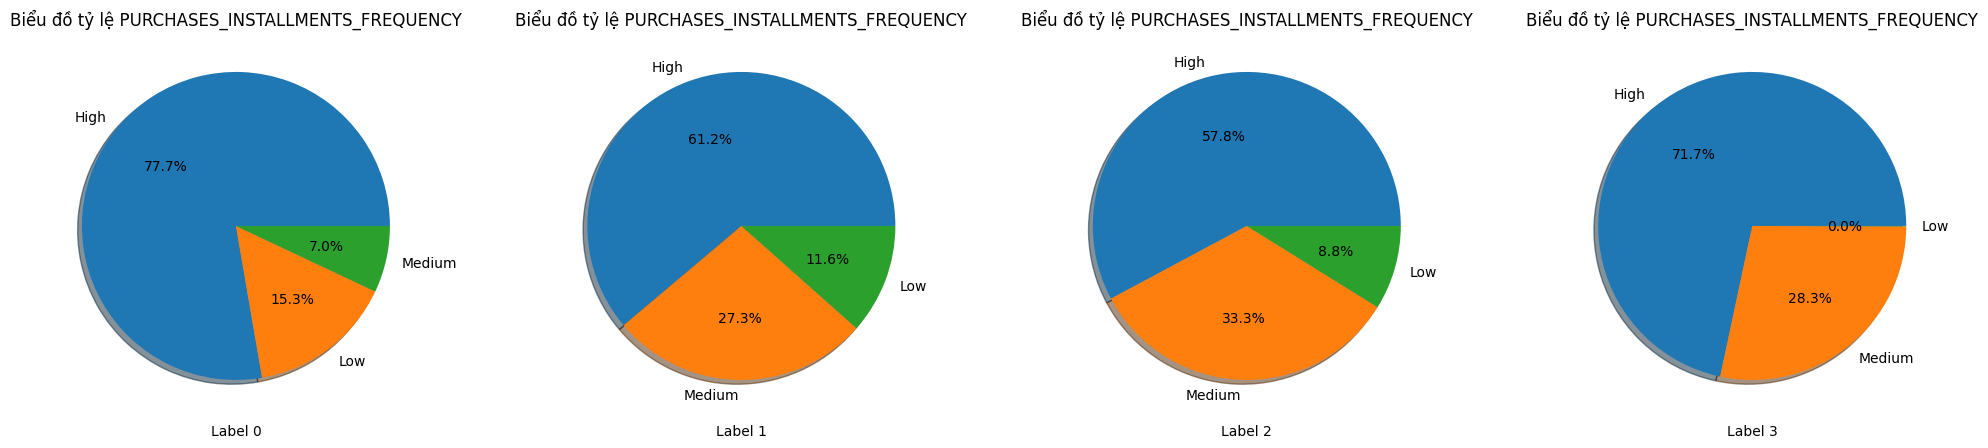

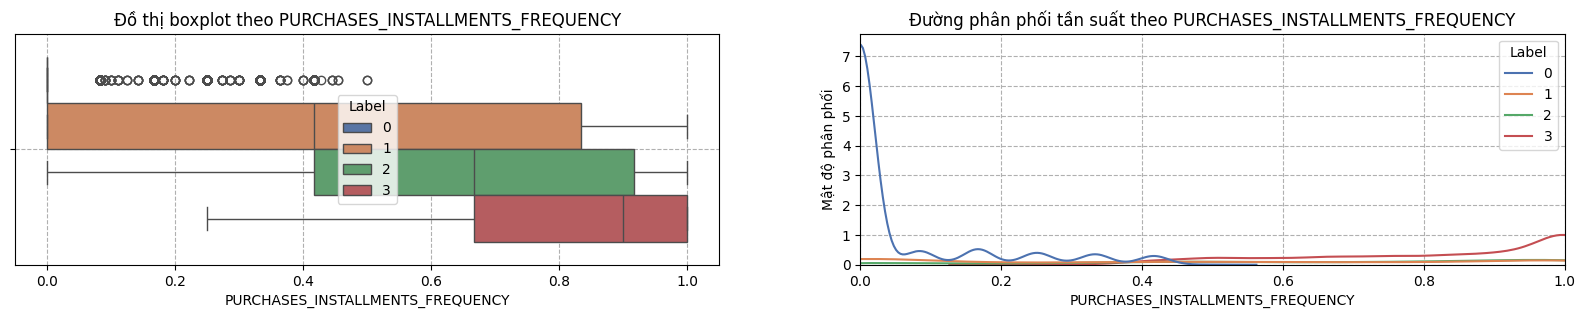





CASH_ADVANCE : 
               0         1         2         3
count   4272.00   1228.00    927.00   2209.00
mean    1456.89    651.77     78.68    673.87
std     2426.70   2042.87    637.16   1669.27
min        0.00      0.00      0.00      0.00
25%        0.00      0.00      0.00      0.00
50%      475.90      0.00      0.00      0.00
75%     1960.64    283.54      0.00    513.29
max    47137.21  29282.11  14048.07  26268.70


<Figure size 640x480 with 0 Axes>

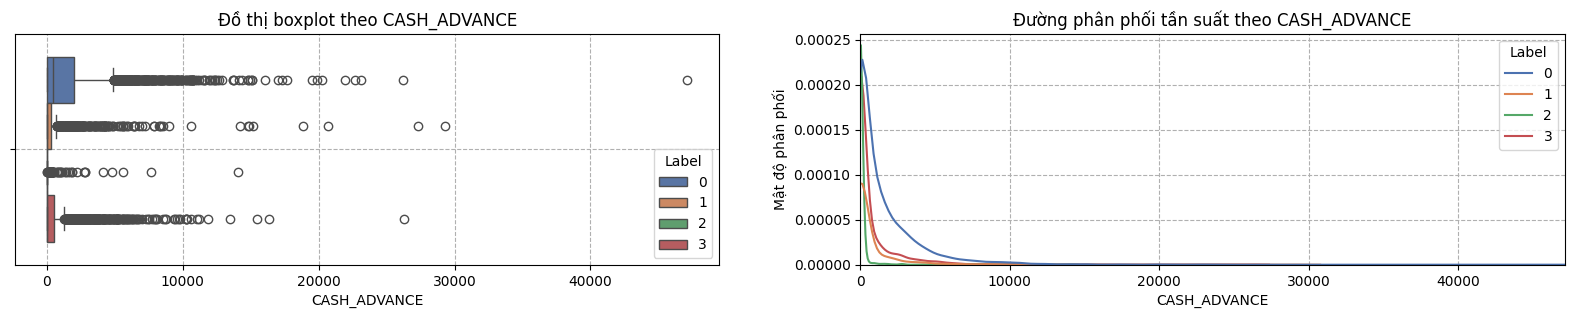





CASH_ADVANCE_TRX : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      4.79     2.15    0.21     2.40
std       8.08     5.58    1.41     5.71
min       0.00     0.00    0.00     0.00
25%       0.00     0.00    0.00     0.00
50%       2.00     0.00    0.00     0.00
75%       6.00     1.00    0.00     2.00
max     123.00    51.00   23.00    71.00


<Figure size 640x480 with 0 Axes>

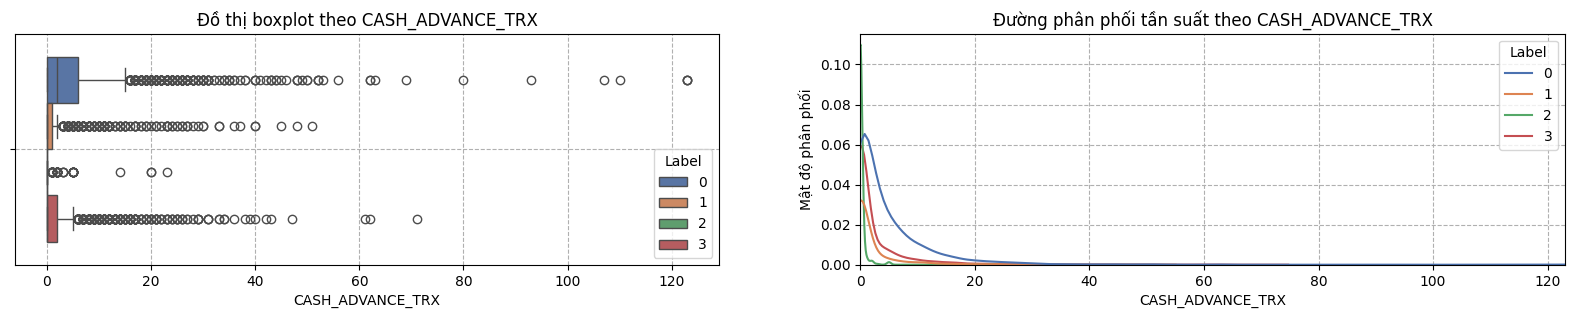





CASH_ADVANCE_FREQUENCY : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.20     0.09    0.01     0.10
std       0.22     0.18    0.05     0.18
min       0.00     0.00    0.00     0.00
25%       0.00     0.00    0.00     0.00
50%       0.17     0.00    0.00     0.00
75%       0.33     0.08    0.00     0.14
max       1.00     1.00    0.92     1.00


<Figure size 640x480 with 0 Axes>

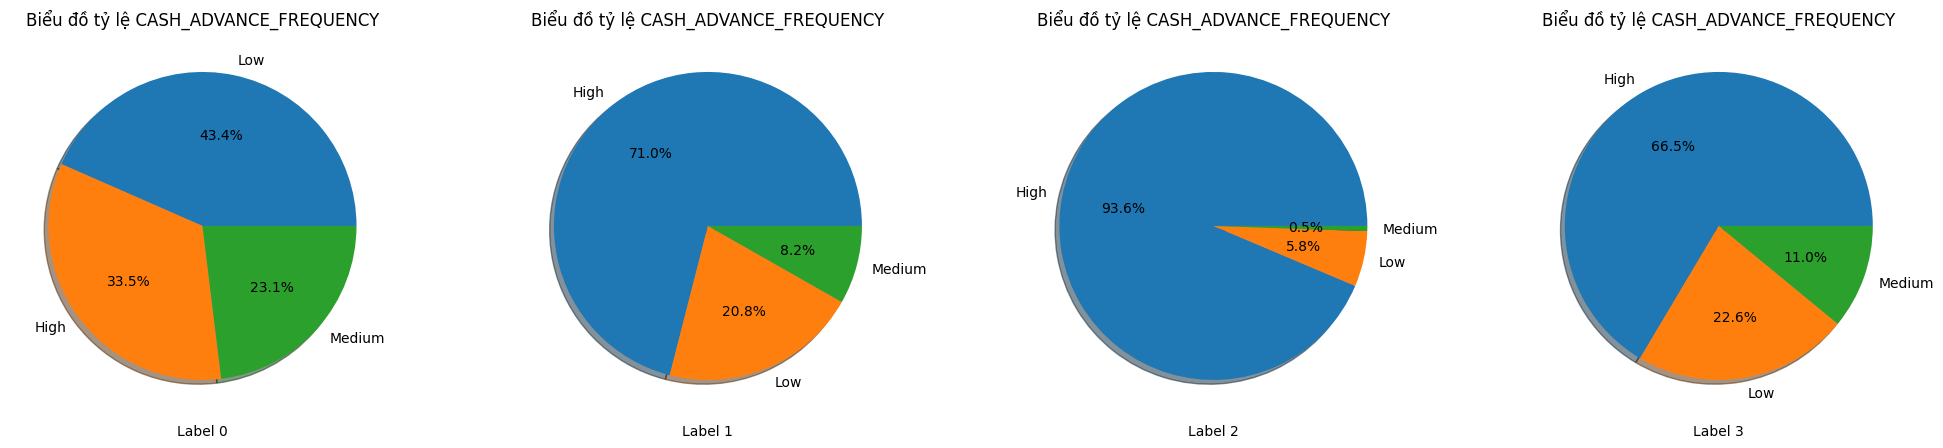

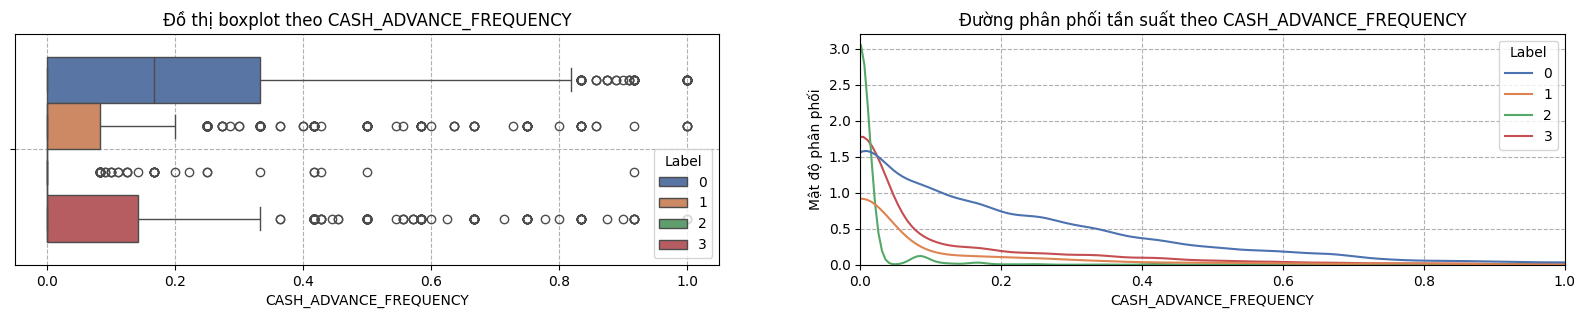





PAYMENTS : 
               0         1         2         3
count   4272.00   1228.00    927.00   2209.00
mean    1535.08   3332.35   1381.09   1575.59
std     2614.91   4484.91   2311.25   2214.32
min        0.05     38.77     16.39     18.50
25%      353.89   1063.85    374.92    433.86
50%      718.36   1961.70    740.05    907.60
75%     1609.24   3796.52   1514.67   1822.95
max    50721.48  46930.60  34107.07  40627.60


<Figure size 640x480 with 0 Axes>

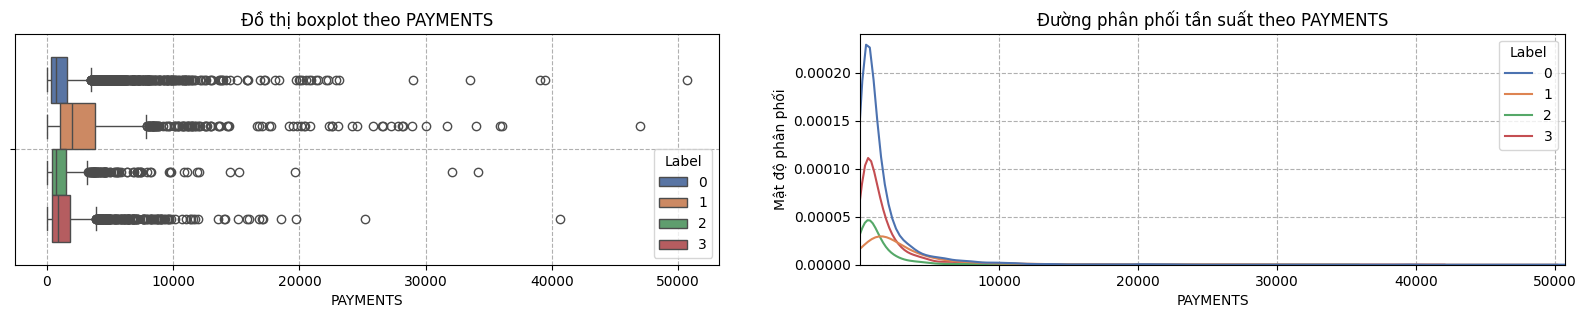





MINIMUM_PAYMENTS : 
               0         1        2         3
count   4272.00   1228.00   927.00   2209.00
mean     885.59    741.24   174.13   1181.18
std     2205.91   1310.75   261.90   3362.78
min        0.06      3.20     1.72      0.02
25%      192.19    185.11   120.50    173.36
50%      410.33    297.19   152.41    371.31
75%      891.22    857.67   174.29   1050.33
max    61031.62  21235.07  4553.16  76406.21


<Figure size 640x480 with 0 Axes>

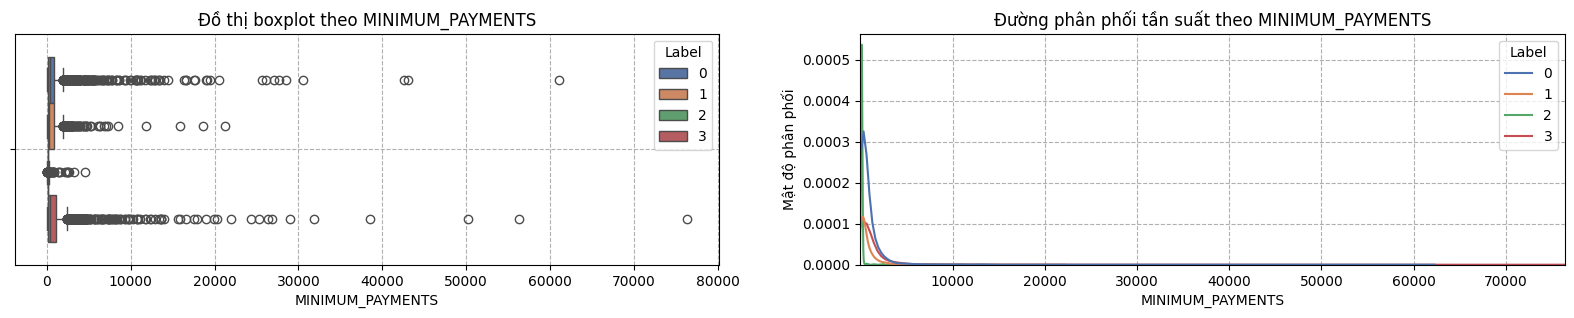





PRC_FULL_PAYMENT : 
              0        1       2        3
count  4272.00  1228.00  927.00  2209.00
mean      0.04     0.26    0.81     0.07
std       0.10     0.36    0.20     0.12
min       0.00     0.00    0.25     0.00
25%       0.00     0.00    0.67     0.00
50%       0.00     0.00    0.86     0.00
75%       0.00     0.45    1.00     0.08
max       1.00     1.00    1.00     0.67


<Figure size 640x480 with 0 Axes>

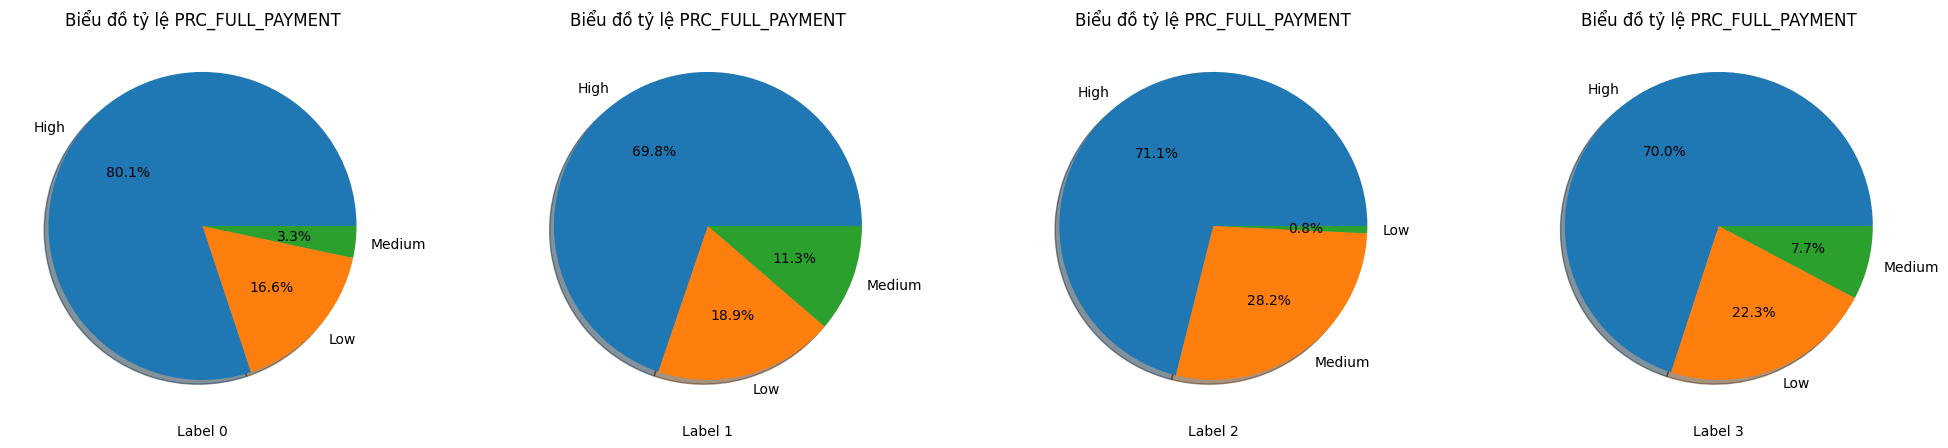

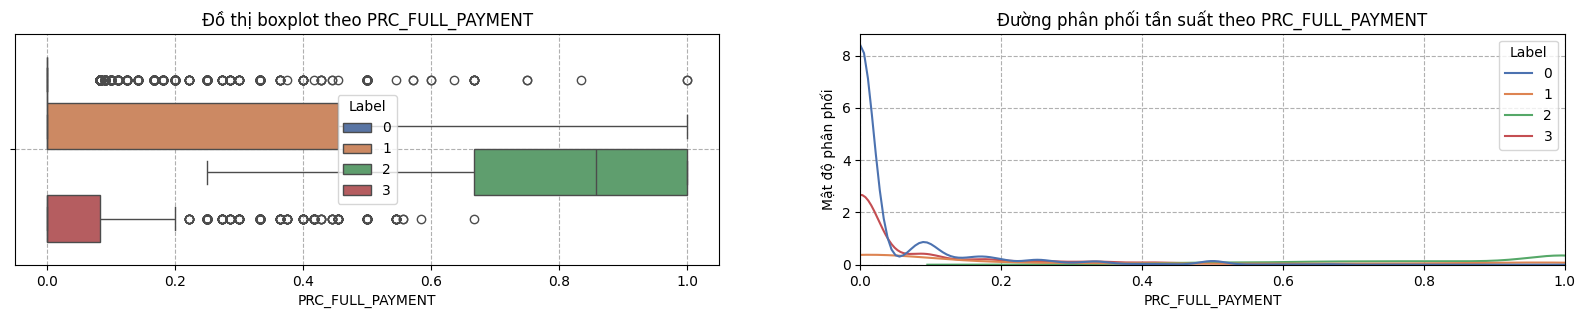





Label : 
             0       1      2       3
count  4272.0  1228.0  927.0  2209.0
mean      0.0     1.0    2.0     3.0
std       0.0     0.0    0.0     0.0
min       0.0     1.0    2.0     3.0
25%       0.0     1.0    2.0     3.0
50%       0.0     1.0    2.0     3.0
75%       0.0     1.0    2.0     3.0
max       0.0     1.0    2.0     3.0


<Figure size 640x480 with 0 Axes>

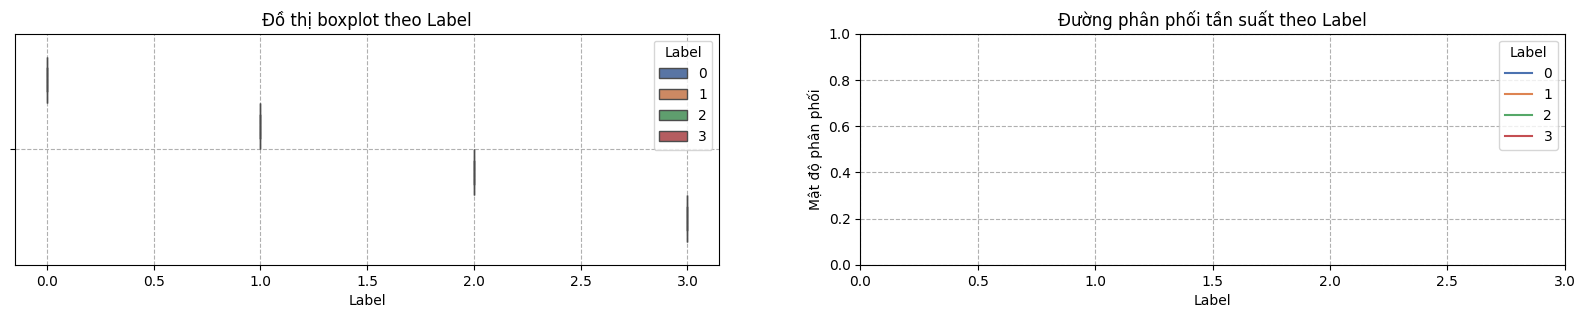

<Figure size 640x480 with 0 Axes>

In [ ]:
# Trực quan hóa kèm số liệu để phân biệt các nhóm:
for col in data2.columns:

  descri=pd.DataFrame()

  for i in range(4):
    descri=pd.concat([descri, data.loc[data['Label']==i,col]],axis=1)
  descri.columns=[0,1,2,3]
  print(col,': \n', round(descri.describe(include='all'),2), end='\n')

  if col in data2.select_dtypes(object).columns:
    fig,ax=plt.subplots(1,4,figsize=(25,5))
    for i in range(4):
      piechart(col,data2[data2['Label']==i], i)
  visualize(col,data,hue='Label',palette='deep')
  plt.tight_layout()
  print(3*'\n')

##3.5 Phân tích đặc điểm từng nhóm:

Dựa theo các đồ thị và bảng trên, ta chia dữ liệu khách hàng thành 4 nhóm:

| Tiêu chí           | Nhóm 1 (0)                                         | Nhóm 2 (1)                                         | Nhóm 3 (2)                                         | Nhóm 4 (3)                                         |
|:---------|:---------------------------------------------------|:---------------------------------------------------|:---------------------------------------------------|:---------------------------------------------------|
| Phân loại          | NHÓM KHÁCH HÀNG RỦI RO                             | NHÓM KHÁCH HÀNG CAO CẤP                            | NHÓM KHÁCH HÀNG MỚI                                | NHÓM KHÁCH HÀNG THÂN THIẾT                         |
| Tỷ lệ              | 50% (4272)                                         | 14% (1228)                                         | 11% (927)                                          | 25% (2209)                                         |
| Hành vi tín dụng   | Trung bình dư nợ: 1847, cao gần bằng nhóm 2, tần   | Hạn mức thẻ tín dụng lớn nhất (6735) kéo theo      | Nhóm có dư nợ thẻ tín dụng thấp nhất (trung bình   | Dự nợ tín dụng trung bình (1581) gần bằng nhóm     |
|                    | suất cập nhật số dư cao (0.87), hạn mức tín dụng   | trung bình dư nợ thẻ tín dụng cũng lớn nhất        | 108 USD) kéo theo tần suất cập nhật số dư cũng     | khách hàng cao cấp, tần suất cập nhật số dư cao    |
|                    | dao động lớn (50->23000 USD)                       | (1907). Dư nợ tín dụng cao (1907) kéo theo tần     | thấp nhất (0.78). Tuy nhiên hạn mức tín dụng bằng  | (0.95), hạn mức tín dụng trung bình (4126) gần     |
|                    |                                                    | suất cập nhật số dư cao (0.98)                     | nhóm 1 và 4                                        | bằng 2 nhóm khách hàng cao cấp và khách hàng       |
|                    |                                                    |                                                    |                                                    | mới,mức thấp nhất (300) vẫn lớn hơn hạn mức thấp   |
|                    |                                                    |                                                    |                                                    | nhất của nhóm khách hàng rủi ro (50)               |
| Hành vi mua sắm    | Tổng chi tiêu cho mua sắm (284 USD) thấp hơn ít    | Tổng số tiền mua sắm lớn nhất (3291), gấp nhiều    | Tổng số tiền (1030), số giao dịch (15), tần suất   | Trung bình tổng số tiền mua sắm (2209), số lần mua |
|                    | nhất 1/3 so với các nhóm còn lại, số lần đi mua    | lần các nhóm còn lại. Tổng số lần mua sắm lớn nhất | mua sắm (0.72) nhiều hơn nhóm 1 (0.14) nhưng ít    | sắm (23) nhiều hơn nhóm khách hàng mới (15), khách |
|                    | sắm thấp (trung bình khoảng 3 lần) kéo theo tần    | (43 lần/1 khách hàng) kèm tần suất mua sắm thường  | hơn nhóm 2 và 4. Tổng số tháng dùng thẻ tín dụng   | hàng rủi ro (2.5), ít hơn khách hàng cao cấp, tần  |
|                    | suất mua sắm thấp (0.14). Số tiền lớn nhất thanh   | xuyên (0.9). Số tiền lớn nhất thanh toán trong 1   | phân phối đều hơn các nhóm còn lại. Số tiền lớn    | suất mua sắm cao (0.87). Số tiền lớn nhất thanh    |
|                    | toán 1 lần (trung bình 234 USD), tần suất trả 1    | lần mua sắm cao nhất (2512) trong các nhóm. Tổng   | nhất trong 1 lần thanh toán thấp (315), tần suất   | toán trong 1 lần, tần suất trả 1 lần tuy lớn hơn   |
|                    | lần thấp (0.08), trung bình số tiền trả góp (50    | số tiền mua sắm theo hình thức trả góp không cao   | mua sắm trả dứt không cao (0.11), tần suất mua trả | nhóm rủi ro, khách hàng mới nhưng vẫn thấp hơn     |
|                    | USD) bằng 1/10 các nhóm còn lại, tần suất mua trả  | bằng (778). Tần suất mua trả 1 lần cao (0.83)      | góp thấp, tổng số tiền chi cho trả góp cũng thấp   | nhóm khách hàng cao cấp 7 lần. Trung bình tổng số  |
|                    | góp siêu thấp (0.05) hầu như không có nhu cầu      | nhưng tần suất trả góp không cao (0.46)            | (715)                                              | tiền mua sắm theo hình thức trả góp (814) và tần   |
|                    |                                                    |                                                    |                                                    | suất trả góp cao nhất (0.82)                       |
| Hành vi ứng tiền   | Số tiền trung bình ứng từ thẻ tín dụng cao (1457   | Tổng số tiền mặt đã rút không cao (trung bình 651  | Phần lớn khách hàng nhóm này không ứng tiền tín    | Trung bình tổng số tiền mặt đã ứng, số lần ứng     |
|                    | USD) ít nhất gấp 2 lần các nhóm còn lại, số lần    | USD), tần suất rút tiền mặt thấp (0.09)            | dụng (trung bình 78 USD)                           | tiền, tần suất ứng tiền (0.1) chỉ thua nhóm khách  |
|                    | ứng tiền lớn nhất (trung bình 4 lần), hơn 75%      |                                                    |                                                    | hàng rủi ro                                        |
|                    | khách hàng có tần suất ứng tiền thường xuyên       |                                                    |                                                    |                                                    |
|                    | (0.33)                                             |                                                    |                                                    |                                                    |
| Hành vi thanh toán | Tổng số tiền trả lại thẻ (1535 USD) gần bằng nhóm  | Tổng số tiền hoàn trả thẻ nhiều nhất ( trung bình  | Trung bình tổng số tiền trả lại thẻ ít nhất (174), | Tuy dư nợ gần bằng khách hàng cao cấp nhưng tổng   |
|                    | 3,4, thua nhóm 2. Số tiền nhỏ nhất đã thanh toán   | 3332 USD), phần trăm số tháng thanh toán toàn bộ   | tỷ lệ vay trả trong tháng cao nhất (0.81)          | tiền hoàn trả lại thua. Số tiền nhỏ nhất trả lại   |
|                    | (885 USD) hơn nhóm 2,3, thua nhóm 4. Phần trăm số  | số dư cao                                          |                                                    | thẻ lớn nhất trong 3 nhóm (trung bình 1181 USD)    |
|                    | tháng thanh toán toàn bộ số dư thấp (0.04), ít     |                                                    |                                                    | nhưng tần suất vay trả hết trong kì hạn thấp       |
|                    | nhất 75% khách hàng không làm việc này             |                                                    |                                                    | (0.07). Tuy vẫn hơn khách hàng rủi ro (0.04) nhưng |
|                    |                                                    |                                                    |                                                    | nhóm đó dính vấn đề về khả năng tín dụng còn nhóm  |
|                    |                                                    |                                                    |                                                    | này là tận dụng tín dụng                           |
| Nhận xét chung     | Nhóm này thường mở thẻ tín dụng để vay tiền mặt    | Nhóm khách hàng này có hạn mức thẻ tín dụng cao,   | Nhóm khách hàng này có thu nhập ổn định và lịch sử | Nhóm này có hành vi tín dụng ổn định, thu nhập ổn  |
|                    | nhanh chóng, thay vì phục vụ nhu cầu mua sắm. Mặc  | điều này chứng tỏ họ có thu nhập ổn định, cao và   | tín dụng tốt, nhưng do là khách hàng mới nên họ    | định và thực hiện giao dịch rất thường xuyên. Họ   |
|                    | dù phí rút tiền mặt qua thẻ rất cao và lãi suất    | đều đặn, cùng với lịch sử tín dụng tốt. Khách hàng | chưa am hiểu rõ về sản phẩm và ngại sử dụng thẻ    | sử dụng thẻ tín dụng chủ yếu cho nhu cầu mua sắm   |
|                    | được tính ngay tại thời điểm rút, họ vẫn sử dụng   | thuộc nhóm này thường xuyên thực hiện các giao     | tín dụng. Họ thực hiện ít giao dịch mua sắm qua    | hàng ngày như thực phẩm, quần áo, dịch vụ giải trí |
|                    | thẻ tín dụng như một công cụ vay mượn, điều này    | dịch và chi tiêu nhiều, cho thấy họ có thói quen   | thẻ, thường chỉ sử dụng khi có ưu đãi hoặc trong   | và thanh toán hóa đơn. Sự tiện lợi và linh hoạt    |
|                    | cho thấy họ đang gặp khó khăn về tài chính, dòng   | mua sắm thường xuyên. Đặc biệt, họ có xu hướng     | dịp đặc biệt. Khách hàng này chủ yếu chi tiêu cho  | của thẻ tín dụng khiến họ thực hiện nhiều giao     |
|                    | tiền không ổn định, và thiếu tiền mặt để trang     | thực hiện nhiều giao dịch nhỏ trong mỗi lần mua    | những thứ cần thiết và hiếm khi mua sắm đồ đắt     | dịch nhỏ, dẫn đến tổng chi tiêu cao. Họ ưa thích   |
|                    | trải các chi phí hàng ngày. Việc rút tiền mặt qua  | sắm, cho thấy sở thích tận hưởng việc chi tiêu,    | tiền, thường chọn mua khi có ưu đãi trả góp. Họ    | hình thức mua sắm trả góp để giảm áp lực tài       |
|                    | thẻ có thể chỉ là giải pháp tạm thời để đối phó    | mua sắm, và du lịch. Họ có xu hướng tiêu dùng      | còn e ngại khi chi tiêu lớn do sợ rủi ro tín dụng  | chính, chia nhỏ số tiền thanh toán thành nhiều kỳ  |
|                    | với tình trạng thiếu hụt, nhưng thói quen này cho  | những mặt hàng đắt tiền và chất lượng cao, và      | và lãi suất. Với thói quen sử dụng tiền mặt, họ    | hạn nhỏ hơn. Điều này giúp họ duy trì thói quen    |
|                    | thấy khả năng quản lý tín dụng của nhóm này rất    | thường có đủ khả năng chi trả một lần cho những    | luôn biết cách cân đối dòng tiền, dẫn đến nợ thẻ   | chi tiêu mà không lo về số tiền lớn ngay lập tức,  |
|                    | thấp. Nhiều người trong nhóm không sử dụng thẻ tín | khoản này, vì vậy ít khi phải chịu lãi suất từ các | rất ít và khả năng thanh toán toàn bộ dư nợ trong  | đồng thời tận dụng các chương trình ưu đãi như     |
|                    | dụng để mua sắm, có thể do họ gặp khó khăn trong   | khoản trả góp. Nhóm khách hàng này có khả năng     | kỳ. Hành vi tín dụng của họ tốt, nhưng họ thường   | hoàn tiền và khuyến mãi. Tuy nhiên, khả năng cân   |
|                    | việc trả nợ, hoặc lo sợ về việc tích lũy thêm nợ.  | kiểm soát tốt dòng tiền và thường sử dụng thẻ tín  | xem thẻ tín dụng như phương án dự phòng, chỉ sử    | đối thu chi của họ không tốt, dễ dẫn đến thiếu hụt |
|                    | Một số ít cá nhân có ý thức hoàn trả tiền để tránh | dụng thay vì tiền mặt, chứng tỏ họ biết cách tận   | dụng khi cần thiết hoặc khi có ưu đãi.             | tiền mặt và chi tiêu vượt quá khả năng chi trả.    |
|                    | lãi kép, nhưng đa số không đủ khả năng thanh toán  | dụng những lợi ích mà thẻ tín dụng mang lại, chẳng |                                                    | Nếu họ thực hiện quá nhiều khoản trả góp, nguy cơ  |
|                    | toàn bộ dư nợ, hoặc thờ ơ với việc này. Do đó,     | hạn như các ưu đãi hoặc điểm thưởng. Họ cũng có    |                                                    | vỡ nợ cũng rất cao.                                |
|                    | nhóm này có nguy cơ vỡ nợ rất cao nếu không thay   | hành vi tín dụng tốt, thanh toán đúng hạn và không |                                                    |                                                    |
|                    | đổi hành vi tín dụng hoặc cải thiện khả năng quản  | để lại dư nợ cao, vì vậy phải chịu lãi suất thấp   |                                                    |                                                    |
|                    | lý tài chính.                                      | hoặc không phải chịu lãi suất.                     |                                                    |                                                    |

##3.6 Triển khai mô hình phân loại

- **Lưu ý**: File đưa vào dự đoán thiếu dữ liệu thì sẽ mặc định giá trị thiếu bằng 0. File sẽ gồm các tính năng:

[['CUST_ID','BALANCE', 'BALANCE_FREQUENCY','CREDIT_LIMIT','TENURE','PURCHASES','PURCHASES_TRX', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY',
'CASH_ADVANCE','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY',
'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']]

- **Cách dùng:**

Bước 1: Tải lên 4 tệp gồm:
  - 'data_scaler.pkl'
  - 'data_pca.pkl'
  - 'data_model.pkl'
  - 'phan_loai_KH.py'
  - 'data_input': file dữ liệu cần dán nhãn

Bước 2: Triển khai code: (copy đoạn code dưới dán vào)

import pandas as pd

from phan_loai_KH import phan_loai_KH

data_input_path= *đường dẫn file input*

df = pd.read_*đuôifile*(data_input_path)

df.head(5)

kq=phan_loai_KH(df)

kq.show_label()

In [3]:
with open('phan_loai_KH.py', 'w') as f:
    f.write("""

# Nhập các thư viện cần thiết
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pickle

# Lớp phân loại khách hàng
class phan_loai_KH:
  def __init__(self,data):
    self.data=data

  def show_label(self):

  #Xử lý dữ liệu có giá trị không phù hợp trong cột '...FREQUENCY'
    def frequency(x):
      if x>=1:
        return 1
      elif x<=0:
        return 0
      else:
        return x
  # Làm sạch dữ liệu
    column=['CUST_ID','BALANCE', 'BALANCE_FREQUENCY','CREDIT_LIMIT','TENURE',
              'PURCHASES','PURCHASES_TRX', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY',
              'CASH_ADVANCE','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY',
              'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

  # Thay các điểm dữ liệu thiếu bằng giá trị 0
    for col in column:
      if col not in self.data.columns:
        self.data[col]=0
        if col !='CUST_ID':
          self.data[col]=pd.to_numeric(self.data[col],errors='coerce').fillna(0)
        else:
          self.data[col]=self.data[col].astype('object')
    self.data.fillna(0,inplace=True)

  # Sắp xếp lại thứ tự cột để ko ảnh hưởng đến PCA
    self.data=self.data[column]

  # Xóa dữ liệu trùng lặp
    self.data.drop_duplicates(inplace=True)

  # Xử lý dữ liệu phi logic
    for col in self.data.columns:
      if 'FREQUENCY' in col:
        self.data[col]=self.data[col].apply(lambda x: frequency(x))

  # Chuẩn hóa dữ liệu:
    with open('data_scaler.pkl', 'rb') as file:
      scaler = pickle.load(file)
    scaled_data = scaler.transform(self.data.select_dtypes(include=[np.number]))

   # Giảm chiều dữ liệu
    with open('data_pca.pkl', 'rb') as file:
      pca = pickle.load(file)
    pca_data=pca.transform(scaled_data)

  # Dự đoán dữ liệu
    with open('data_model.pkl', 'rb') as file:
      model = pickle.load(file)
    data_label=model.predict(pca_data)
    self.data['LABEL']=data_label
    self.data['NHOM']=self.data['LABEL'].replace({0:'KH RỦI RO',1:'KH CAO CẤP',2:'KH MỚI',3:'KH THÂN THIẾT'})

    return self.data[['CUST_ID','NHOM']]

""")

In [ ]:
# Thử
data=pd.read_csv('/content/Customer_Data.csv')
new_data=data.sample(10, random_state=2)
new_data.drop(columns=['BALANCE','BALANCE_FREQUENCY','CREDIT_LIMIT','TENURE',
              'PURCHASES','PURCHASES_TRX'],inplace=True)
new_data
kq=phan_loai_KH(new_data)
kq.show_label()

CUST_ID           NHOM
7357  C17557  KH THÂN THIẾT
6353  C16528  KH THÂN THIẾT
3220  C13314      KH RỦI RO
8325  C18546         KH MỚI
2846  C12928      KH RỦI RO
5879  C16045  KH THÂN THIẾT
8081  C18300         KH MỚI
5960  C16126     KH CAO CẤP
4294  C14412      KH RỦI RO
7236  C17431      KH RỦI RO

#Phần 4: Kết luận:


##4.1 Tóm tắt phát hiện:

Dựa vào thuật toán phân cụm Kmeans, ta đã chia tệp khách hàng thẻ tín dụng ra làm 4 nhóm với rủi ro tín dụng giảm dần như sau:

1, Nhóm khách hàng cao cấp (14%)

2, Nhóm khách hàng mới (11%)

3, Nhóm khách hàng thân thiết (25%)

4, Nhóm khách hàng rủi ro (50%)

##4.2 Đề xuất giải pháp:

Nhìn trên ta thấy 2 nhóm khách hàng cao cấp và khách hàng mới chứa tiềm năng có thể khai thác thêm nhưng lại chiếm tỷ trọng nhỏ so với tệp khách hàng (14%, 11%), trong khi nhóm khách hàng rủi ro lại chiếm tỷ trọng đến 50%. Vì vậy cần có những chiến lược mới để thay đổi tỷ lệ, tăng tỷ lệ khách hàng hành vi tín dụng tốt và giảm tỷ lệ khách hàng rủi ro.

1, Nhóm khách hàng cao cấp:

- Tăng cường giữ chân và tăng giá trị thông qua các chương trình giảm giá, tích điểm đối với mặt hàng cao cấp, quyền lợi riêng biệt, các phần thưởng đặc biệt, hoặc quyền lợi VIP. Đồng thời, phát triển các dịch vụ hoặc sản phẩm giá trị gia tăng để thúc đẩy chi tiêu từ nhóm này.

- Sử dụng nghiệp vụ và các thuật toán học máy để phân tích thói quen, sở thích của từng người từ đó tung ra các khuyến mãi, đề xuất có khả năng cao được khách hàng hưởng ứng.

- Nhóm này ngoài tiền còn kèm cả tri thức nên họ có khả năng sẽ hứng thú với các sản phẩm giúp họ tích lũy thêm kinh nghiệm, kiến thức như du lịch, máy đọc sách, khóa học, thực phẩm sức khỏe cao cấp, các sản phẩm tài chính,...

- Thường xuyên gửi thiệp, bánh vào các dịp đặc biệt cho các cá nhân tiêu biểu chi tiêu nhiều, hành vi tín dụng tốt bên cạnh đó khuyến khích khách hàng phản hồi chất lượng dịch vụ của ngân hàng để điều chỉnh.


2, Nhóm khách hàng mới:

- Đây là nhóm tiềm năng, tuy chiếm tỷ lệ nhỏ nhưng có thể tăng trưởng cao. Cần tập trung vào việc tối ưu hóa trải nghiệm ban đầu để giữ chân họ. Có thể cung cấp ưu đãi cho lần mua sắm đầu tiên, các hướng dẫn sử dụng sản phẩm/dịch vụ hoặc chăm sóc khách hàng tích cực để tạo ấn tượng tốt.

- Sử dụng chiến lược tiếp thị đa kênh, như email marketing, quảng cáo trực tuyến, và mạng xã hội, để tăng sự hiện diện và thu hút thêm khách hàng mới.


3, Nhóm khách hàng thân thiết:

- Nhóm này chiếm tỷ lệ khá lớn và đã có mối quan hệ tích cực với doanh nghiệp. Tạo ra các chương trình khách hàng thân thiết, thưởng điểm khi mua sắm hoặc ưu đãi đặc biệt khi họ giới thiệu bạn bè. Mục tiêu là thúc đẩy họ trở thành khách hàng cao cấp bằng cách tăng tần suất mua sắm và giá trị đơn hàng.

- Khuyến khích phản hồi: Lấy ý kiến từ nhóm này để cải thiện sản phẩm/dịch vụ và giữ cho họ cảm thấy có giá trị trong mối quan hệ với công ty.

- Mở các chương trình giới thiệu bạn bè, người thân dùng dịch vụ sẽ được phí hoa hồng, liên kết với các thương hiệu đồ tiêu dùng, chi tiêu để cài chiết khấu riêng khi xài thẻ tín dụng ngân hàng.


4, Nhóm khách hàng rủi ro:

- Chiến lược giảm rủi ro: Đây là nhóm chiếm tỷ lệ lớn và tiềm ẩn nhiều rủi ro. Có thể họ đang có xu hướng rời bỏ sản phẩm/dịch vụ, vì vậy cần có chiến lược ngăn chặn. Cần phân tích nguyên nhân họ trở thành khách hàng rủi ro (chất lượng sản phẩm, dịch vụ chăm sóc khách hàng kém, hoặc giá cả không phù hợp).

- Tùy chỉnh theo mức độ rủi ro: Với những khách hàng chỉ mới có dấu hiệu rủi ro nhẹ, có thể sử dụng các biện pháp mềm mại hơn như gửi email nhắc nhở, khuyến mãi cá nhân. Với những khách hàng rủi ro cao, cần hành động mạnh hơn như liên lạc trực tiếp qua điện thoại, phổ cập kiến thức về các hạn chế khi dính nợ xấu cho các khách hàng này.

- Phân tích rủi ro tín dụng qua hành vi tín dụng của khách hàng ở đầu vào kĩ rồi mới xem xét hạn mức tín dụng cho từng khách hàng. Hạ lãi suất cho các khách hàng có rủi ro vỡ nợ cao để thu hồi được gốc.
